# CSMODEL Project Phase 1
## Group X1
- Dichoso, Aaron Gabrielle C.
- Natividad, Josh Austin Mikhail T.
- Razon, Luis Miguel Antonio B.
- Tordillo, Christian Dave P.

## Dataset Description

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Theme only
from IPython.core.display import display #used to display big lists

# sets the theme of the charts
plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', 500)
%matplotlib inline

This notebook will be utilizing the dataset called **"Spotify Daily Top 200 Tracks in the Philippines"**.
It contains information about the Daily Top 200 most streamed songs on Spotify from January 1, 2017 until March 31, 2023. 

The entire dataset is seperated into three files.

In [2]:
#Loading the three datasets
charts_df = pd.read_csv('ph_spotify_daily_charts.csv')
charts_artists_df = pd.read_csv('ph_spotify_daily_charts_artists.csv')
charts_tracks_df = pd.read_csv('ph_spotify_daily_charts_tracks.csv')

In [3]:
def print_df(df, head=10):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df.head(head))

The **first file** contains data about the tracks that made it to the Top 200 for a specific day. The following are descriptions of each variable in the dataset. 
- **`date`**: the exact date the track is in the Daily Top 200 Chart.
- **`position`**: the position of the track based on the number of streams. Values are limited in the range of 1 to 200.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>"
- **`track_name`**: the name of the track/song
- **`artist`**: the name of the artist who made the track/song
- **`streams`**: number of times the song was played

The file was loaded in the code blocks below. It contains *456200* observations, each observation representing a track that was part of the Daily Top 200 Chart for a specific day. It means that it can contain multiple instances for the same track, given that it belongs to the Top 200 Charts for a different date.

In [4]:
charts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456201 entries, 0 to 456200
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        456201 non-null  object
 1   position    456201 non-null  int64 
 2   track_id    456201 non-null  object
 3   track_name  456191 non-null  object
 4   artist      456191 non-null  object
 5   streams     456201 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.9+ MB


In [5]:
#Top 5 songs for January 1st, 2017
charts_df.head(5)

,date,position,track_id,track_name,artist,streams
0,01/01/2017,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,01/01/2017,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,01/01/2017,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,01/01/2017,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,01/01/2017,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


The **second file** contains information about the artists who made the songs that reached the Daily Top 200 Charts. The following are descriptions of each variable in the dataset.
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform.
- **`artist_name`**: the name of the artist
- **`total_followers`**: the number of followers the artist had on the time of recording the data
- **`genres`**: an array containing the genres the artist is associated with (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-artist)
- **`popularity`**: an integer between 0 being the lowest to 100 being the highest, representing the popularity of the artist calculated from all of their tracks.

The code blocks below show that there are *988* observations for this file, each observation representing a unique artist whose tracks made it into the Daily Top 200 Charts atleast once.

In [6]:
charts_artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_id        988 non-null    object
 1   artist_name      988 non-null    object
 2   total_followers  988 non-null    int64 
 3   genres           988 non-null    object
 4   popularity       988 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 38.7+ KB


In [7]:
#First 5 artists in the dataset
charts_artists_df.head(5)

,artist_id,artist_name,total_followers,genres,popularity
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,"['dance pop', 'pop']",89
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,"['pop', 'talent show', 'uk pop']",82
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,20036566,"['dance pop', 'edm', 'electropop', 'pop', 'pop...",81
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,40125006,['pop'],86
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8535540,"['dance pop', 'pop', 'post-teen pop']",73


The **third file** contains data about the specific details about the tracks listed in the **first file**. The following are descriptions of each variable in the dataset.
- **`track_id`**: the unique identifier Spotify uses to identify the songs on their platform. They can be specifically used this way: "https://open.spotify.com/track/<track_id>". Identical to their respective observations in the **first file**
- **`track_name`**: the name of the track/song. Identical to their respective observations in the **first file**
- **`artist_id`**: the unique identifier Spotify uses to identify the artists on their platform. Identical to their respective observations in the **second file**
- **`artist_name`**: the name of the artist. Identical to their respective observations in the **second file**
- **`album_id`**: the unique identifier Spotify uses for the album that contains the track/song (if any). [Source](https://developer.spotify.com/documentation/web-api/reference/get-an-album)
- **`duration`**: the duration of the song in milliseconds
- **`release_date`**: the date the album containing the track/song was released
- **`popularity`**: the popularity of the album represented as an integer between 0 being the lowest to 100 being the highest
- **`danceability`**: describes how suitable a song is for dancing based on musical elements present in the track specifically the tempo, rhythm stability, beat strength, and overall regularity. It has a value between 0 being the least danceable to 1 being the most danceable.
- **`energy`**: a value between 0 to 1 representing the measure of intensity and activity.
- **`key`**: a value ranging from -1 to 11 representing the key the track is in using Standard Pitch Class Notation. e.g. 0 = C, 1 = C#/Db, and so on. -1 is the sentinel value. 
- **`loudness`**: overall (average) loudness of a track in decibels. Values typically range between -60 to 0 db. [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-analysis)
- **`mode`**: a value of either 0 or 1 indicating the modality of a track, 0 represents *minor* and 1 represents *major* 
- **`speechiness`**: a value representing the presence of spoken words detected in a track. It ranges between 0 to 1 where tracks that are exclusively speech-like has a value that is closer to 1.0
- **`acousticness`**: a value between 0 to 1 representing the confidence that the track is acoustic. 1.0 represents high confidence that the track is acoustic
- **`instrumentalness`**: a value between 0 to 1 representing a prediction whether the track has no vocals. The closer the value is to 1.0, the greater likelihood that it has no vocal content.
- **`liveness`**: a value between 0 to 1 representing the presence of an audience detected in the recording. A value above 0.8 provides a strong likelihood that the track is live (performed and recorded in front of an audience).
- **`valence`**: a value between 0 to 1 representing the positiveness conveyed by a track. A value closer to 1.0 represents a positive track (e.g. happy or cheerful) and a value closer to 0.0 represents a negative track (e.g. sad or depressing)
- **`tempo`**: a value representing the overall tempo (speed or pace) of a track in beats per minute (BPM). [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

The code blocks below show that the file contains *4768* observations, each observation representing a unique track that was in the Daily Top 200 Charts atleast once.

In [8]:
charts_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4768 non-null   object 
 1   track_name        4763 non-null   object 
 2   artist_id         4768 non-null   object 
 3   artist_name       4763 non-null   object 
 4   album_id          4768 non-null   object 
 5   duration          4768 non-null   int64  
 6   release_date      4768 non-null   object 
 7   popularity        4768 non-null   int64  
 8   danceability      4767 non-null   float64
 9   energy            4767 non-null   float64
 10  key               4767 non-null   float64
 11  loudness          4767 non-null   float64
 12  mode              4767 non-null   float64
 13  speechiness       4767 non-null   float64
 14  acousticness      4767 non-null   float64
 15  instrumentalness  4767 non-null   float64
 16  liveness          4767 non-null   float64


In [9]:
charts_tracks_df.head(5)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,87,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,71,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


# Data Cleaning

Before Exploratory Data Analysis could be performed, the dataset first needs to be cleaned. The first method of data cleaning that will be explored is dealing with duplicate songs but are given two different track ids. This usually happens when an artist releases two copies of the same song in Spotify, usually one being a single and another being part of a whole album. For the purposes of this project, we wish to consider these duplicate entries of the song as 1 song only. As such, for data cleaning, duplicate entries of a song need to first be detected and then promptly manipulated in such a way as to result in 1 single entry per song, wwhile still keeping the relevant information given by the duplicate entries.

To do so, we search for tracks which have duplicate names in the tracks dataset.

In [10]:
#Get a series where each observation is a boolean which states whether its corresponding index in charts_tracks_df has a duplicate
charts_tracks_dupe_trackname = charts_tracks_df.duplicated(subset='track_name', keep=False)

#Introduce charts_tracks_dupe_trackname as a column in charts_tracks_df
charts_tracks_df['duplicate_by_name'] = charts_tracks_dupe_trackname

#Looks for a track whos potentially a duplicate and whos track name is "'Di Na Babalik" as an example
charts_tracks_df.query("duplicate_by_name == True")[charts_tracks_df['track_name'] == "'Di Na Babalik"]

C:\Users\Luis\AppData\Local\Temp\ipykernel_27688\2831901673.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  charts_tracks_df.query("duplicate_by_name == True")[charts_tracks_df['track_name'] == "'Di Na Babalik"]


,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1951,5S4T2Pdr8qhetF3UhkwuMj,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,7zJxOlHuAGpCC7ZtKHm0Rz,340262,2019-02-03,0,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.112,0.14,76.132,True
2061,7hoP5NDUXEbmOawvEAsi8h,'Di Na Babalik,5HIZU0JzM0AgfItVOm4E08,This Band,0pFRzLxgSt9QlXKuukR8A4,340262,2019-02-03,1,0.358,0.435,10.0,-7.265,1.0,0.0349,0.00819,0.000936,0.112,0.14,76.132,True


This method is effective in detecting observations with the same **track_name**. We can also see that the reason these duplicate observations were allowed to exist is because they have unique values for the **track_id** variable, which is Spotify's way for uniquely identifying tracks. This can be seen with the observations whose **track_name** values are both *'Di Na Babalik* which was also performed by the same artist and has completely identical values for the rest of the variables which allows us to conclude that these two observations are indeed duplicates. A theory as to why these duplicates exist is because although they are the exact same track, they are uploaded multiple times to Spotify for various reasons, leading Spotify to treat it as different tracks.

Although this detects observations with the same **track_name** values, there are several issues that arise from this method. A major issue that can be seen is that since it only detects duplicates by one variable, it ignores cases of duplicates where the variable has different values leading to *false negatives* in checking for duplicates. An example of one such case is shown below:

In [11]:
charts_tracks_df[charts_tracks_df['track_name'].str.contains('DALLA DALLA') == True]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1952,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,2KC9Qb60EaY0kW4eH68vr3,ITZY,2gHd5bCrj42s8nwwXBALd4,199873,2019-02-13,0,0.79,0.853,11.0,-4.564,0.0,0.0666,0.00116,0.000042,0.329,0.713,125.000,False
1976,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),2KC9Qb60EaY0kW4eH68vr3,ITZY,0fUJLlrsG1MpTHr3MxPN9C,199873,2019-02-12,0,0.79,0.853,11.0,-4.564,0.0,0.0665,0.00116,0.000042,0.329,0.713,124.998,False


It also presents an issue where observations with the same **track_name** values are detected but they should not be considered duplicates. An example is shown below:

In [12]:
charts_tracks_df[charts_tracks_df['track_name'] == '\'Di Na Muli']

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name
1360,3VQb0rq27GPX92X53Ni1Lc,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,1hwjIPHrnNBFuxWBWRHmge,207018,2018-04-06,0,0.413,0.561,1.0,-3.092,1.0,0.0517,0.192,0.0,0.0914,0.352,88.690,True
1376,0eKQS9aRwCW2J5q6uDKX7S,'Di Na Muli,5cYJYBMg1n71v7cvthr1SO,The Itchyworms,3sBZBmTeB7QMWL4by9ybWm,260599,2018-05-15,0,0.517,0.468,4.0,-6.582,1.0,0.0345,0.702,0.0,0.1520,0.266,121.284,True
1389,0rkML0CSX3wteVwUh5cspv,'Di Na Muli,5cYJYBMg1n71v7cvthr1SO,The Itchyworms,3GX88wDTaudQN9oK5j4kf1,260599,2018-06-04,0,0.517,0.468,4.0,-6.582,1.0,0.0345,0.702,0.0,0.1520,0.266,121.284,True
2063,6p6DiqAPwMX7vdrSo30wgo,'Di Na Muli,09Xydf4dlkr29dH99DmsvQ,Janine Teñoso,4u7nLwDVRz7z0mxweMbVZ6,207018,2018-04-06,0,0.413,0.561,1.0,-3.092,1.0,0.0517,0.192,0.0,0.0914,0.352,88.690,True


As we can see, the first example shows that they are not considered as duplicates as seen where their **duplicate_by_name** variable is flagged as *False*. The second example then shows four observations with all equal titles but as observed, only two of the four observations that are flagged as **duplicates** are actually duplicates and the rest are *false positives*.

To address these inconsistencies present in the dataset, a new method to clean the dataset is required. From observing similarities in values between duplicate entries, it is apparent that the **duration** and **artist_name** values of the tracks are identical. This makes sense, seeing that a duplicate track uploaded by an artist would still be the same song, just under different **track_id**s.

An implementation of this can be seen below:

In [13]:
charts_tracks_dupe_artistname_duration = charts_tracks_df.duplicated(subset=['duration','artist_name'], keep=False)

charts_tracks_df['duplicate_by_artistname_duration'] = charts_tracks_dupe_artistname_duration
possible_duplicates_df = charts_tracks_df.query("duplicate_by_artistname_duration == True").sort_values(by=['artist_name', 'duration'], inplace=False)


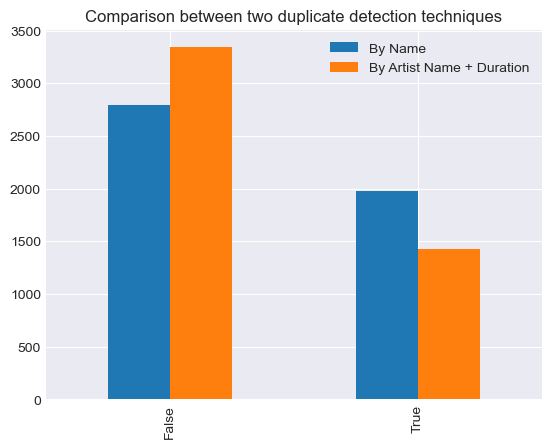

In [14]:
duplicate_by_name_counts = charts_tracks_df["duplicate_by_name"].value_counts()
duplicate_by_artistname_duration_counts = charts_tracks_df["duplicate_by_artistname_duration"].value_counts()
duplicate_comparison_df = pd.DataFrame({"By Name": duplicate_by_name_counts, "By Artist Name + Duration": duplicate_by_artistname_duration_counts})

duplicate_bar_plot = duplicate_comparison_df.plot.bar(title = "Comparison between two duplicate detection techniques")
plt.show()

As we can see, changing the variables used to detect for duplicated led to better results wherein less observations are flagged as duplicates, thereby reducing *false positives* when detecting duplicates. It is not a 100% guarantee that all the *positive* observations are truly duplicates so at this point, there is no choice but to examine every observation that are considered as a duplicate.

This also addresses the first problem of *false negatives* discussed earlier since it is now dependent on variables that is more uniquely identifiable to a given song.

In [15]:
charts_tracks_df[charts_tracks_df['track_name'].str.contains('DALLA DALLA') == True]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration
1952,6G7DuXoSGeAf6BZivJdEjF,달라달라 DALLA DALLA,2KC9Qb60EaY0kW4eH68vr3,ITZY,2gHd5bCrj42s8nwwXBALd4,199873,2019-02-13,0,0.79,0.853,...,-4.564,0.0,0.0666,0.00116,0.000042,0.329,0.713,125.000,False,True
1976,0GU5GuJQQEnnREO2FxnVPT,달라달라 (DALLA DALLA),2KC9Qb60EaY0kW4eH68vr3,ITZY,0fUJLlrsG1MpTHr3MxPN9C,199873,2019-02-12,0,0.79,0.853,...,-4.564,0.0,0.0665,0.00116,0.000042,0.329,0.713,124.998,False,True


Now we can easily scan the dataset in order to double check and handle the duplicates. Luckily, this also includes observations that have empty **track_name** and **artist_name** variables which we could assume are deleted songs and should be excluded in the datasets.

After examining the dataset, we can now remove the *false positives* that remained.  

In [16]:
false_positive_ids = ['27OeeYzk6klgBh83TSvGMA', '1EHUQesfVKwbthtNcpBi9g', '4HBvwhhYo7YiYXkUDrOHzS', '2UYG331lOP6amEWplE7eno', '5EzitieoPnjyKHAq0gfRMa', '01QhKtUc12FGw2wX7dMYvv', '59c0HrzmHfyQs6LgDw5cHe',
                      '0VwNdo84DaVYLIkbVO86ND', '7AWtaOSb7cgi16wJr3mkuf', '3AyLh4R4D3fQfyqCsTdFf3', '514mQDPkXmPzsYwGNmkBJZ', '1QCqedB1ibmRO9x7Ikb5LI', '4VYEnxm7lmtG5sEEbcmORB', '3h34cQPPddk4x9cluPIAvv',
                      '2CWnuF7ht55Ajyeg4WPvWu', '3i9UVldZOE0aD0JnyfAZZ0', '6KUE0HSSudAp9AOycaF6SH', '314ZkcV7oLWG8yWE7LABvH', '3FeVmId7tL5YN8B7R3imoM', '2sp32rIevQhpbo0Z4aQzoe', '42CeaId2XNlxugDvyqHfDf',
                      '7CZyCXKG6d5ALeq41sLzbw', '3OaBCFROgrLRbZGCFP6E3M', '6ce41JVa6KFaryfmC2bu2W', '7oDd86yk8itslrA9HRP2ki', '57Enap29zKl7NGRdDJjkjA', '6g1NlCpW7fgqDnWbCCDrHl', '0nrRP2bk19rLc0orkWPQk2']

#remove all the observations in the false_positive_ids from the dataset
possible_duplicates_df = possible_duplicates_df[~possible_duplicates_df['track_id'].isin(false_positive_ids)]

Now instead of using the contents of **possible_duplicates_df** to clean up the **charts_tracks_df** DataFrame, we first need it to use it to clean **charts_df**. This is because the **charts_df** DataFrame also contains the duplicate observations that were presented. 

The plan is to first set up a lookup table wherein duplicate observations would be replaced by one observation that represents that specific group of duplicates, essentially grouping the duplicates into one main observation.

In [17]:
original_artist_name = None
original_duration = None
original_track_name = None
original_track_id = None

result_list = []
for idx, row in possible_duplicates_df.iterrows():
    curr_artist_name = row['artist_name']
    curr_duration = row['duration']
    curr_track_name = row['track_name']
    curr_track_id = row['track_id']

    if ((original_artist_name != curr_artist_name) or (original_duration != curr_duration)):
        original_artist_name = curr_artist_name
        original_duration = curr_duration
        original_track_name = curr_track_name
        original_track_id = curr_track_id
    else:
        result = {'original_track_id': original_track_id, 'original_track_name': original_track_name, 'duplicate_track_id': curr_track_id, 'duplicate_track_name': curr_track_name}
        result_list.append(result)
lookup_duplicate_df = pd.DataFrame(result_list)
print_df(lookup_duplicate_df, 20)

    

,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
0,3ZoHHYydoQNWIKdP59knYA,Pajama Party,1K3qfNiMOzI5cbILMuWnRN,Pajama Party (Cypher1)
1,5eqK0tbzUPo2SoeZsov04s,Bank Account,2fQrGHiQOvpL9UgPvtYy6G,Bank Account
2,55S2PQgSMYAhgoTCcGCDfw,Youngblood,2iUXsYOEPhVqEBwsqP70rE,Youngblood
3,4ZYdtbaKQsa5jSeQYjKoop,KNOW ME,5HthkOEb7X9jUiBeJFHOlY,KNOW ME
4,3CboywxfJIgvHqi2FF4exb,Loverboy,0qXP5fMhxGzxALOkXYUxfP,Loverboy
5,3sm9FJhwOjsdzrfRgIf1ZK,Dalaga,3PLARiBoxCpJFUMZhvV63x,Dalaga
6,3u9tIlAnygQGNJ5VuSvTfi,Bagay Tayo,2mwd0LWLBgtQBEOLG96nbU,Bagay Tayo
7,1t7AA4xxqEseapeIJCiQ5l,When I Met You,1iphKsRTqRl7KZeOZwILGF,When I Met You
8,628A1ThsViFrgjqgRAy4aa,Diwata,3qs5vRk6QTsyeRjZZquDvb,Diwata
9,7rPLZ8Krm6CZIbraFUlnWZ,Make You Feel My Love,0mqTcM8kuu2IYPotMt7AzS,Make You Feel My Love


After observing the rows in the newly constructed DataFrame, there are still some inconsistencies. Namely, some tracks that were grouped together actually had distinct differences with one another, such is the case of the observation seen below:

In [18]:
lookup_duplicate_df[lookup_duplicate_df['original_track_name'] == 'SET ME FREE']

,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
583,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,6bkTxw6m6vl8Oc3xtKBXN0,SET ME FREE (ENG)
584,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,1Zr1SoGePJ3iKKakmmZaMR,SET ME FREE
585,4OtVQ2ZxS7yigIjGz5yKg1,SET ME FREE,63zZufrRDgwcVMUbvbfcJh,SET ME FREE - ENG


The tracks above is an example of the limitations of this data cleaning technique, as in reality, there are two versions of the song, the original version and the english version. There are other cases that result in this inconsistency, such as an instrumental version of the duplicate being grouped with one with vocals. Below, these inconsistencies are manually addressed by reassigning their original **track_id**s again:

In [19]:
inconsistent_groupings = [
        [
            {'track_id': '3omvXShuRPM3zbDpWYqf5g', 'track_name': 'MORE & MORE'},
            {'track_id': '2bAAj29XGc4h1G4oEGYCmg', 'track_name': 'MORE & MORE'}
        ],
        [
            {'track_id': '03wvlNaxFKB9sge4U6vyPE', 'track_name': 'MORE & MORE (English Version)'},
            {'track_id': '0E3LHQbZTPLyw06z6XvmNn', 'track_name': 'MORE & MORE - English Ver.'}
        ],
        [
            {'track_id': '0gptQQwXDtDYkkgoQl1V9T', 'track_name': 'Permission to Dance (Instrumental)'},
            {'track_id': '0h1bCFiGHWBB1Wq61W0wZj', 'track_name': 'Permission to Dance (Instrumental)'}   
        ],
        [
            {'track_id': '3XYRV7ZSHqIRDG87DKTtry', 'track_name': 'Permission to Dance'},   
            {'track_id': '5eXBXreN3d1zdj6Sa8dS0u', 'track_name': 'Permission to Dance'},   
            {'track_id': '0LThjFY2iTtNdd4wviwVV2', 'track_name': 'Permission to Dance'}   
        ],
        [
            {'track_id': '1Zr1SoGePJ3iKKakmmZaMR', 'track_name': 'SET ME FREE'},   
            {'track_id': '4OtVQ2ZxS7yigIjGz5yKg1', 'track_name': 'SET ME FREE'}
        ],
        [
            {'track_id': '63zZufrRDgwcVMUbvbfcJh', 'track_name': 'SET ME FREE - ENG'},   
            {'track_id': '6bkTxw6m6vl8Oc3xtKBXN0', 'track_name': 'SET ME FREE (ENG)'}
        ]
    ]

#Drop the existing observations first
for grouping in inconsistent_groupings:
    for indiv_entries in grouping:
        #returns a Int64Index([index, index, index], dtype='int64')
        idx = lookup_duplicate_df[lookup_duplicate_df['original_track_id'] == indiv_entries['track_id']].index
        if (idx.size > 0):
            lookup_duplicate_df.drop(idx, inplace=True)


#Adding the groupings into lookup_duplicate_df as intended
original_track_name = None
original_track_id = None
result_list = []
for grouping in inconsistent_groupings:
        for i in range(len(grouping)):
            if (i == 0):
                original_track_name = grouping[i]['track_name']
                original_track_id = grouping[i]['track_id']
            else:
                result = {'original_track_id': original_track_id, 'original_track_name': original_track_name, 'duplicate_track_id': grouping[i]['track_name'], 'duplicate_track_name': grouping[i]['track_id']}
                result_list.append(result)

temp_df = pd.DataFrame(result_list)
lookup_duplicate_df = pd.concat([lookup_duplicate_df, temp_df], ignore_index=True)
lookup_duplicate_df.tail(10)


,original_track_id,original_track_name,duplicate_track_id,duplicate_track_name
740,33a5I5tDvZoI3iIucwrho5,lutang,6jB7cmxRuvf5QUxYl73q0o,lutang
741,1Ry0l6trESL8T4ddsRaYLE,An Art Gallery Could Never Be As Unique As You,22Nd3GuO7sHopPjdKccRcq,An Art Gallery Could Never Be As Unique As You
742,3sJKnpDvliJ9OH4cORjatB,Ligaya,4IeuTj1pEHuL9vJSiEqEfR,Ligaya
743,3omvXShuRPM3zbDpWYqf5g,MORE & MORE,MORE & MORE,2bAAj29XGc4h1G4oEGYCmg
744,03wvlNaxFKB9sge4U6vyPE,MORE & MORE (English Version),MORE & MORE - English Ver.,0E3LHQbZTPLyw06z6XvmNn
745,0gptQQwXDtDYkkgoQl1V9T,Permission to Dance (Instrumental),Permission to Dance (Instrumental),0h1bCFiGHWBB1Wq61W0wZj
746,3XYRV7ZSHqIRDG87DKTtry,Permission to Dance,Permission to Dance,5eXBXreN3d1zdj6Sa8dS0u
747,3XYRV7ZSHqIRDG87DKTtry,Permission to Dance,Permission to Dance,0LThjFY2iTtNdd4wviwVV2
748,1Zr1SoGePJ3iKKakmmZaMR,SET ME FREE,SET ME FREE,4OtVQ2ZxS7yigIjGz5yKg1
749,63zZufrRDgwcVMUbvbfcJh,SET ME FREE - ENG,SET ME FREE (ENG),6bkTxw6m6vl8Oc3xtKBXN0


Now that the groupings created are consistent, we can now use it to clean up the dataset in **charts_df**. The plan is to replace the **track_id** and **track_name** variables of the dataset when it is flagged as a duplicate using **lookup_duplicate_df** with the **original_track_id** and **original_track_name** values of its corresponding observation. However, there is a problem that needs to be addressed where more than one instance of the duplicates can appear in the dataset for a specific day. This means that multiple versions of the same song reached the daily top 200 in the Philippines during that day, as seen with the example below where observations that have the same track_name and artist are seen with the same date:

In [20]:
print_df(charts_df[charts_df.duplicated(subset=['date', 'track_name', 'artist'], keep=False)], 20)

,date,position,track_id,track_name,artist,streams
39406,20/07/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,121541
39423,20/07/2017,24,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,85374
39426,20/07/2017,27,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,81223
39455,20/07/2017,56,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,46754
39606,21/07/2017,7,3RXkboS74UYzN14xTqzPyY,NaN,NaN,120186
39621,21/07/2017,22,4JAyIDXOqNM6qHuZML01uX,NaN,NaN,92580
39628,21/07/2017,29,3eFJqPe8VUYrABbFjSauuj,NaN,NaN,83205
39690,21/07/2017,91,3bVbQvGVIe4n24AzyXovXh,NaN,NaN,35049
119428,24/08/2018,29,03iCbZaM4OkRR4We6wIzvx,IDOL,BTS,68017
119449,24/08/2018,50,2AIWoHr9DF6y4KALCBKWQS,IDOL,BTS,54709


To handle this problem, a solution would be to first replace the duplicate observations with their original counterparts using the lookup table we generated. Afterwards, if multiple observations of the original was detected in the same day, we would need to drop the other observations except for one and add the **streams** of the dropped observations to the one that remains and we could also remove the empty obersvations too in the process. 

This data cleaning process was considered since it seemed logical that people were listening to the same song in different **track_id**s, hence the combination of streams. After everything is done, we would need to re-calibrate the charts so that the position of the track correctly corresponds to their new stream count.

In [21]:
#Step 1: Replace all the duplicate observations with their original counterparts

#Tracker if it worked
init_chart_count = charts_df['track_id'].value_counts().size

for duplicates in lookup_duplicate_df.iterrows():
    #Replaces all instances of track_id and track_name of the duplicates with the original values
    charts_df.loc[charts_df['track_id'] == duplicates[1]['duplicate_track_id'], ['track_id', 'track_name']] = [duplicates[1]['original_track_id'], duplicates[1]['original_track_name']]

#Expected, init > final
final_chart_count = charts_df['track_id'].value_counts().size

In [22]:
print(f"charts_df transformation: {init_chart_count} => {final_chart_count}")

charts_df transformation: 4770 => 4027


In [23]:
#Step 2: If more than one occurence of the same track_id is found on the same day, add the streams together

#Check how many duplicates exist before cleaning the data
duplicates_per_day = charts_df.duplicated(subset=['date', 'track_id'], keep=False).value_counts()

#use sum to add the streams and position (doesn't matter since we will recalibrate position later) based on the track id and given date, and reset_index prevents grouping of the dataset and resets the index to accomodate for removed values
charts_df = charts_df.groupby(['date', 'track_id']).sum().reset_index()

#create empty columns that are removed by the groupby
charts_df["track_name"] = ""
charts_df["artist"] = ""

#return the values removed by using the charts_tracks_df as reference
for track in charts_tracks_df.iterrows():
    charts_df.loc[charts_df['track_id'] == track[1]['track_id'], ['track_name', 'artist']] = [track[1]['track_name'], track[1]['artist_name']]

#recheck how many duplicates after the operation to see the changes made. Expected: total number of observations lessen and the number of true values = 0
duplicates_per_day_recheck = charts_df.duplicated(subset=['date', 'track_id'], keep=False).value_counts()

From the operations done above, we can observe that duplicate entries from the daily top 200s in the Philippines were resolved.

In [24]:
pd.DataFrame(dict(duplicates_per_day = duplicates_per_day, duplicates_per_day_recheck = duplicates_per_day_recheck)).replace(np.nan, 0).style.set_caption("Before and After solving the duplicates")

,duplicates_per_day,duplicates_per_day_recheck
False,455941,456071.000000
True,260,0.000000


In [25]:
#Step 3: Remove NaN Values from all three datasets
init_nan_charts_df = charts_df.isna().sum()
init_nan_charts_tracks_df = charts_tracks_df.isna().sum()
init_nan_charts_artists_df = charts_artists_df.isna().sum()

charts_df.dropna(inplace=True)
charts_tracks_df.dropna(inplace=True)
charts_artists_df.dropna(inplace=True)

final_nan_charts_df = charts_df.isna().sum()
final_nan_charts_tracks_df = charts_tracks_df.isna().sum()
final_nan_charts_artists_df = charts_artists_df.isna().sum()

In [26]:
pd.DataFrame(dict(init_nan_charts_df = init_nan_charts_df, final_nan_charts_df = final_nan_charts_df)).style.set_caption("Before and After clearing NaN charts_df")

,init_nan_charts_df,final_nan_charts_df
date,0,0
track_id,0,0
position,0,0
streams,0,0
track_name,10,0
artist,10,0


In [27]:
pd.DataFrame(dict(init_nan_charts_tracks_df = init_nan_charts_tracks_df, final_nan_charts_tracks_df = final_nan_charts_tracks_df)).style.set_caption("Before and After clearing NaN charts_tracks_df")

,init_nan_charts_tracks_df,final_nan_charts_tracks_df
track_id,0,0
track_name,5,0
artist_id,0,0
artist_name,5,0
album_id,0,0
duration,0,0
release_date,0,0
popularity,0,0
danceability,1,0
energy,1,0


In [28]:
pd.DataFrame(dict(init_nan_charts_artists_df = init_nan_charts_artists_df, final_nan_charts_artists_df = final_nan_charts_artists_df)).style.set_caption("Before and After clearing NaN charts_artists_df")

,init_nan_charts_artists_df,final_nan_charts_artists_df
artist_id,0,0
artist_name,0,0
total_followers,0,0
genres,0,0
popularity,0,0


In [29]:
#Step 4: Re-calibrate the positions of the tracks in charts_df
#To re-calibrate, we need to rearrange the data by date and descending order based on the number of streams. Afterwards, per day, we assign their respective positions with 1 being the highest until the last one for the day, reset to 1 after the day
#convert the date string to datetime for the dataframe
charts_df['date'] = pd.to_datetime(charts_df['date'], format="%d/%m/%Y")

#Sort by date in ascending order and streams in descending order.
charts_df.sort_values(by=['date', 'streams'], ascending=[True, False], inplace=True)

#Reset the index and drop the new index column that gets created
charts_df = charts_df.reset_index()
charts_df.drop(columns=['index'], inplace=True)

In [30]:
curr_date = None
i = 1
inconsistencies_fixed = 0
#NOTE: may take a while to run (~8m)
#Each index in the tuple corresponds to 0 = index, 1 = date, 2 = track_id, 3 = position, 4 = streams, 5 = track_name, 6 = artist
for row in charts_df.iterrows():
    row_index = row[0]
    row_date = row[1]['date']
    if curr_date != row_date:
        curr_date = row_date
        i = 1
    
    #to ensure that it is editing something
    init_position = charts_df.iloc[row_index]['position']

    charts_df.loc[[row_index], 'position'] = i

    final_position = charts_df.iloc[row_index]['position']
    
    #second run of this block should result to no changes
    if (init_position != final_position):
        inconsistencies_fixed += 1

    i += 1
print(f"{inconsistencies_fixed} inconsistent positions fixed")

20713 inconsistent positions fixed


Finally, **duplicate_track_id** variable in **lookup_table_df** is used as reference to remove the duplicate observations in **charts_tracks_df**.

In [31]:
total = 0
init_charts_tracks_count = charts_tracks_df.shape[0]
#0 = index, 1 = original_track_id, 2 = original_track_name,  3 = duplicate_track_id, 4 = duplicate_track_name
for row in lookup_duplicate_df.iterrows():
    duplicate_track_id = row[1]['duplicate_track_id']
    index_duplicates = charts_tracks_df[charts_tracks_df['track_id'] == duplicate_track_id].index
    
    #for keeping cound
    total += index_duplicates.size

    #drop the indexes
    charts_tracks_df.drop(index_duplicates, inplace=True)

final_charts_tracks_count = charts_tracks_df.shape[0]
print(f"Size of charts_tracks_df after dropping duplicates: {init_charts_tracks_count} => {final_charts_tracks_count}")
print(f"Duplicate observations dropped from charts_tracks_df: {total}")

Size of charts_tracks_df after dropping duplicates: 4762 => 4020
Duplicate observations dropped from charts_tracks_df: 742


After performing these operations, the datasets are now cleared of duplicates. To finish the data cleaning process for **charts_tracks_df**, the *release_date* column will be transformed into three new columns, *release_day*, *release_month*, and *release_year*.

In [32]:
#Get the release dates of all tracks
charts_release_dates_df = charts_tracks_df['release_date'].to_frame()
charts_release_dates_df.insert(1, "release_year", [0 for _ in range(charts_release_dates_df.shape[0])])
charts_release_dates_df.insert(2, "release_month", [0 for _ in range(charts_release_dates_df.shape[0])])
charts_release_dates_df.insert(3, "release_day", [0 for _ in range(charts_release_dates_df.shape[0])])

#Go through each date
for idx, value in charts_release_dates_df['release_date'].items():
    #Get the year, month, and day from the date and assign to respective columns
    date_parts = value.split("-")

    try:
        charts_release_dates_df.loc[idx, 'release_year'] = date_parts[0]
    except:
        charts_release_dates_df.loc[idx, 'release_year'] = -1
    try:
        charts_release_dates_df.loc[idx, 'release_month'] = date_parts[1]
    except:
        charts_release_dates_df.loc[idx, 'release_month'] = -1
    try:
        charts_release_dates_df.loc[idx, 'release_day'] = date_parts[2]
    except:
        charts_release_dates_df.loc[idx, 'release_day'] = -1

#Assign the new dataframe onto charts_tracks_df
charts_tracks_df = pd.concat([charts_release_dates_df, charts_tracks_df], axis=1).drop(['release_date'], axis=1)
charts_tracks_df

,release_year,release_month,release_day,track_id,track_name,artist_id,artist_name,album_id,duration,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration
0,2016,11,17,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,75,...,-6.209,1.0,0.0454,0.1960,0.000000,0.0830,0.301,174.152,False,False
1,2016,10,28,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,87,...,-7.398,1.0,0.0590,0.6950,0.000000,0.0902,0.494,85.043,False,False
2,2016,07,29,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,85,...,-5.599,1.0,0.0338,0.4140,0.000000,0.1110,0.661,95.010,False,False
3,2016,09,29,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,71,...,-8.821,1.0,0.0307,0.0970,0.002720,0.1150,0.296,90.000,False,False
4,2016,10,11,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,0,...,-6.126,1.0,0.0800,0.3380,0.000000,0.0975,0.447,100.048,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,2023,03,27,0zWuvPDqBa0WM9Ffwl0rgb,Kitsch,6RHTUrRF63xao58xh9FXYJ,IVE,12p68ehzb26xvidlV2ypur,195440,56,...,-4.938,1.0,0.0519,0.0108,0.000001,0.0496,0.467,102.006,True,True
4764,2021,08,15,6TKDFOO6Rv6VuB9PxcXQO3,G Wolf,3PDFGpPl4ienSn5Vwisfrh,Flow G,5NyBYQ3AAjobmwtKXicPzR,197328,66,...,-9.542,0.0,0.2680,0.1520,0.000000,0.0949,0.535,156.071,False,False
4765,2023,03,31,69CrOS7vEHIrhC2ILyEi0s,FLOWER,6UZ0ba50XreR4TM8u322gs,JISOO,4QuczuzDZNzCDli5Gz6DQ0,173134,82,...,-7.684,0.0,0.0351,0.0236,0.000002,0.0735,0.597,123.961,False,False
4766,2023,03,31,2YXswOX5aKv6OHRKUcAMLQ,All Eyes On Me,6UZ0ba50XreR4TM8u322gs,JISOO,4QuczuzDZNzCDli5Gz6DQ0,163522,78,...,-5.884,0.0,0.0388,0.0260,0.000027,0.0943,0.628,110.048,False,False


The same data cleaning operation will also be performed on the *date* column found in **charts_df** for similar reasons.

In [33]:
#Get the release dates of all tracks
charts_dates_df = charts_df['date'].to_frame()
charts_dates_df.insert(1, "year", [0 for _ in range(charts_dates_df.shape[0])])
charts_dates_df.insert(2, "month", [0 for _ in range(charts_dates_df.shape[0])])
charts_dates_df.insert(3, "day", [0 for _ in range(charts_dates_df.shape[0])])

#Go through each date
for idx, value in charts_dates_df['date'].items():
    #Get the year, month, and day from the date and assign to respective columns
    date_parts = [value.year, value.month, value.day]

    try:
        charts_dates_df.loc[idx, 'year'] = date_parts[0]
    except:
        charts_dates_df.loc[idx, 'year'] = -1
    try:
        charts_dates_df.loc[idx, 'month'] = date_parts[1]
    except:
        charts_dates_df.loc[idx, 'month'] = -1
    try:
        charts_dates_df.loc[idx, 'day'] = date_parts[2]
    except:
        charts_dates_df.loc[idx, 'day'] = -1

#Assign the new dataframe onto charts_tracks_df
charts_df = pd.concat([charts_dates_df, charts_df], axis=1).drop(['date'], axis=1)
charts_df

,year,month,day,track_id,position,streams,track_name,artist
0,2017,1,1,0kN8xEmgMW9mh7UmDYHlJP,1,185236,Versace on the Floor,Bruno Mars
1,2017,1,1,5uCax9HTNlzGybIStD3vDh,2,180552,Say You Won't Let Go,James Arthur
2,2017,1,1,7BKLCZ1jbUBVqRi2FVlTVw,3,158720,Closer,The Chainsmokers
3,2017,1,1,2rizacJSyD9S1IQUxUxnsK,4,130874,All We Know,The Chainsmokers
4,2017,1,1,5MFzQMkrl1FOOng9tq6R9r,5,129656,Don't Wanna Know,Maroon 5
...,...,...,...,...,...,...,...,...
456056,2023,3,31,4VXIryQMWpIdGgYR4TrjT1,195,63001,All Girls Are The Same,Juice WRLD
456057,2023,3,31,1Ry0l6trESL8T4ddsRaYLE,196,62803,An Art Gallery Could Never Be As Unique As You,mrld
456058,2023,3,31,5qmXgeIDa1lXB07pgAVlNM,197,62731,Stickwitu,The Pussycat Dolls
456059,2023,3,31,1xK59OXxi2TAAAbmZK0kBL,198,62646,Romantic Homicide,d4vd


Now, **charts_artists_df** will need to be cleaned. upon observation of the dataframe, it can be seen that the **genres** variable is represented as an array. Where unique values in each observation are differentiated by the array.
However, it can be seen that many artists have similar genres to each other.

In [34]:
#View the different genres of music that artists are associated with.
charts_artists_df['genres'].unique()

array(["['dance pop', 'pop']", "['pop', 'talent show', 'uk pop']",
       "['dance pop', 'edm', 'electropop', 'pop', 'pop dance', 'tropical house']",
       "['pop']", "['dance pop', 'pop', 'post-teen pop']",
       "['canadian contemporary r&b', 'canadian pop', 'dance pop', 'pop', 'post-teen pop']",
       "['dance pop', 'edm', 'electronic trap', 'pop', 'pop dance', 'pop rap']",
       "['canadian contemporary r&b', 'canadian pop', 'pop']",
       "['nyc pop']",
       "['dance pop', 'edm', 'electro house', 'moombahton', 'pop', 'pop dance', 'pop rap', 'tropical house']",
       "['dance pop', 'edm', 'pop', 'pop dance', 'tropical house', 'uk dance']",
       "['ohio hip hop', 'pop', 'pop rap']",
       "['dance pop', 'pop', 'post-teen pop', 'uk pop']",
       "['boy band', 'dance pop', 'pop', 'post-teen pop']",
       "['dance pop', 'dutch edm', 'edm', 'pop', 'pop dance', 'progressive house', 'tropical house']",
       "['aussietronica', 'dance pop', 'pop dance', 'tropical house']",
  

First, some artists do not have an associated genre. In these cases, representing this state with a sentinel value would be ideal for future dataset operations.

In [35]:
charts_artists_df['genres'] = charts_artists_df['genres'].replace("[]", "['NO_GENRE']")
charts_artists_df['genres'].unique()

array(["['dance pop', 'pop']", "['pop', 'talent show', 'uk pop']",
       "['dance pop', 'edm', 'electropop', 'pop', 'pop dance', 'tropical house']",
       "['pop']", "['dance pop', 'pop', 'post-teen pop']",
       "['canadian contemporary r&b', 'canadian pop', 'dance pop', 'pop', 'post-teen pop']",
       "['dance pop', 'edm', 'electronic trap', 'pop', 'pop dance', 'pop rap']",
       "['canadian contemporary r&b', 'canadian pop', 'pop']",
       "['nyc pop']",
       "['dance pop', 'edm', 'electro house', 'moombahton', 'pop', 'pop dance', 'pop rap', 'tropical house']",
       "['dance pop', 'edm', 'pop', 'pop dance', 'tropical house', 'uk dance']",
       "['ohio hip hop', 'pop', 'pop rap']",
       "['dance pop', 'pop', 'post-teen pop', 'uk pop']",
       "['boy band', 'dance pop', 'pop', 'post-teen pop']",
       "['dance pop', 'dutch edm', 'edm', 'pop', 'pop dance', 'progressive house', 'tropical house']",
       "['aussietronica', 'dance pop', 'pop dance', 'tropical house']",
  

To be able to easier perform exploratory data analysis and data mining techniques, it would be favorable to transform the **genres** variable into a representation that will allow for one-hot encoding. To perform this operation, all unique genres across all artists will first need to be extracted. This can be done by storing all entries of genres across all observations in a list, then converting the said list into a set data structure, which disallows duplicate entries. Afterwards, it can then be converted back into a list again.

In [36]:
#List of store all genres
artist_genres = []

#Go through all genres
for idx, genres in charts_artists_df['genres'].items():
    #Type of value is a string, need to convert into list first
    
    #Remove characters ([,],')
    genres = genres.translate({ord("'"): None, ord("\""): None, ord("["): None, ord("]"): None})
    genres = genres.split(", ")
    for genre in genres:
        artist_genres.append(genre)

artist_genres = list(set(artist_genres))
print("Artist Genres: ")
print("Number of Unique Genres: " + str(len(artist_genres)))

artist_genres.sort()
artist_genres

Artist Genres: 
Number of Unique Genres: 407


['NO_GENRE',
 'a cappella',
 'acoustic cover',
 'acoustic opm',
 'acoustic pop',
 'adult standards',
 'afro r&b',
 'afrofuturism',
 'album rock',
 'alt z',
 'alternative hip hop',
 'alternative metal',
 'alternative pop rock',
 'alternative r&b',
 'american folk revival',
 'anime',
 'argentine hip hop',
 'art pop',
 'art rock',
 'asian american hip hop',
 'atl hip hop',
 'atl trap',
 'aussietronica',
 'australian dance',
 'australian electropop',
 'australian hip hop',
 'australian indie',
 'australian pop',
 'australian r&b',
 'australian talent show',
 'barbadian pop',
 'baroque pop',
 'bass trap',
 'basshall',
 'beatlesque',
 'bedroom pop',
 'bedroom soul',
 'belgian dance',
 'belgian edm',
 'big room',
 'bisaya rap',
 'black americana',
 'blues rock',
 'boston folk',
 'boy band',
 'brazilian gospel',
 'brill building pop',
 'british indie rock',
 'british soul',
 'britpop',
 'broadway',
 'brooklyn drill',
 'brooklyn indie',
 'brostep',
 'bubblegrunge',
 'bubblegum pop',
 'cali rap'

From the performed operation, it can be observed that there are 407 unique genres across all artists in  **charts_artists_df**. these will become new columns in **charts_artists_df**, and artists who are associated with the genres will be given a value of 1 or given a 0 if they are not associated with the genre.

In [37]:
artist_genre_dict = {}
for i in range(len(artist_genres)):
    artist_genre_dict[artist_genres[i]] = i
artist_genre_dict

{'NO_GENRE': 0,
 'a cappella': 1,
 'acoustic cover': 2,
 'acoustic opm': 3,
 'acoustic pop': 4,
 'adult standards': 5,
 'afro r&b': 6,
 'afrofuturism': 7,
 'album rock': 8,
 'alt z': 9,
 'alternative hip hop': 10,
 'alternative metal': 11,
 'alternative pop rock': 12,
 'alternative r&b': 13,
 'american folk revival': 14,
 'anime': 15,
 'argentine hip hop': 16,
 'art pop': 17,
 'art rock': 18,
 'asian american hip hop': 19,
 'atl hip hop': 20,
 'atl trap': 21,
 'aussietronica': 22,
 'australian dance': 23,
 'australian electropop': 24,
 'australian hip hop': 25,
 'australian indie': 26,
 'australian pop': 27,
 'australian r&b': 28,
 'australian talent show': 29,
 'barbadian pop': 30,
 'baroque pop': 31,
 'bass trap': 32,
 'basshall': 33,
 'beatlesque': 34,
 'bedroom pop': 35,
 'bedroom soul': 36,
 'belgian dance': 37,
 'belgian edm': 38,
 'big room': 39,
 'bisaya rap': 40,
 'black americana': 41,
 'blues rock': 42,
 'boston folk': 43,
 'boy band': 44,
 'brazilian gospel': 45,
 'brill bu

A list of lists is then created, corresponding to the indices of the genres of each observation, allowing for the easy and eventual conversion of the genres onto a one hot encoding method.

In [38]:
#Go through all genres
artist_genres_values = [] 
for idx, genres in charts_artists_df['genres'].items():
    #Type of value is a string, need to convert into list first
    
    #Remove characters ([,],')
    genres = genres.translate({ord("'"): None, ord("\""): None, ord("["): None, ord("]"): None})
    genres = genres.split(", ")

    #At this point, genres is now a list of strings, convert into a list of numbers corresponding to the values in
    #artist_genre_dict
    indices = []
    for genre in genres:
        indices.append(artist_genre_dict[genre]);
    artist_genres_values.append(indices)
artist_genres_values

[[97, 306],
 [306, 369, 385],
 [97, 132, 136, 306, 307, 380],
 [306],
 [97, 306, 320],
 [58, 62, 97, 306, 320],
 [97, 132, 135, 306, 307, 314],
 [58, 62, 306],
 [271],
 [97, 132, 134, 248, 306, 307, 314, 380],
 [97, 132, 306, 307, 380, 382],
 [276, 306, 314],
 [97, 306, 320, 385],
 [44, 97, 306, 320],
 [97, 125, 132, 306, 307, 322, 380],
 [97, 306],
 [22, 97, 307, 380],
 [97, 254, 306, 314, 315, 320],
 [62, 97, 306, 395],
 [97, 132, 306, 307, 314, 380, 382, 383],
 [277, 298],
 [97, 306, 395],
 [97, 132, 134, 307, 314, 380],
 [97, 165, 306, 320, 369, 385],
 [9, 306],
 [97, 306],
 [175, 235, 242, 314, 328, 358, 376],
 [27, 97, 306, 395],
 [61, 62, 175, 328, 374],
 [9, 97, 136, 306, 307, 320, 380],
 [0],
 [277, 298],
 [97, 121, 306, 320, 345],
 [306, 314, 320, 327],
 [97, 132, 134, 306, 307, 308, 364, 380],
 [314],
 [277, 291, 298, 315],
 [72],
 [306, 385],
 [277],
 [0],
 [142],
 [97, 132, 134, 178, 306, 322, 382],
 [97, 165, 306, 320, 369],
 [277, 399],
 [97, 132, 306, 307, 320, 341, 362

In [39]:
#Create a new pandas dataframe with shape (num of artists x num of unique genres)
genres_df = pd.DataFrame([[0 for _ in range(len(artist_genres))] for _ in range(len(artist_genres_values))], columns=artist_genres)

#Using the generated list of list of indices, encode a 1 onto the corresponding observation and variable.
for i in range(len(artist_genres_values)):
    genres_df.iloc[i, artist_genres_values[i]] = 1
genres_df

#Replace the genres column in charts_artists_df with this new dataframe
charts_artists_df = charts_artists_df.drop(['genres'], axis=1)
charts_artists_df = pd.concat([charts_artists_df, genres_df], axis=1, join='inner')
charts_artists_df

,artist_id,artist_name,total_followers,popularity,NO_GENRE,a cappella,acoustic cover,acoustic opm,acoustic pop,adult standards,...,virgin islands reggae,virginia hip hop,vispop,vocal house,vocal jazz,west coast rap,westcoast flow,world worship,worship,yacht rock
0,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,47387027,89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4IWBUUAFIplrNtaOHcJPRM,James Arthur,11471232,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,20036566,81,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,04gDigrS5kc9YWfZHwBETP,Maroon 5,40125006,86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5p7f24Rk5HkUZsaS3BLG5F,Hailee Steinfeld,8535540,73,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1chOgh5tgwfiyJ2zhUHwBj,Dionela,53753,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
984,4GJ6xDCF5jaUqD6avOuQT6,FIFTY FIFTY,325207,77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,4NsbfTEC3nOcc0vOpZ1rRc,HELLMERRY,21845,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,6UZ0ba50XreR4TM8u322gs,JISOO,655567,75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finally, **charts_artists_df** is now ready for data operations requiring one hot encoding techniques.

To finish cleaning the datasets, the last thing we need to do is check if all the values of each numeric variables are in range, which could be seen in the **Dataset Description** portion of this notebook.

In [40]:
#Checking charts_df
position_value_errors = charts_df.query("position <= 0 | position > 200").shape[0]
streams_value_errors = charts_df.query("streams < 0").shape[0]

print(f"charts_df numerical variables report: \nPosition Value Errors Detected: {position_value_errors} \nStreams Value Errors Detected:  {streams_value_errors}")

charts_df numerical variables report: 
Position Value Errors Detected: 0 
Streams Value Errors Detected:  0


In [41]:
#Checking charts_tracks_df

error_list = {
    'duration': charts_tracks_df.query("duration <= 0").shape[0],
    'popularity': charts_tracks_df.query("popularity < 0 | popularity > 100").shape[0],
    'danceability': charts_tracks_df.query("danceability < 0 | danceability > 1").shape[0],
    'energy': charts_tracks_df.query("energy < 0 | energy > 1").shape[0],
    'key': charts_tracks_df.query("key < -1 | key > 11").shape[0],
    'loudness': charts_tracks_df.query("loudness < -60 | loudness > 0").shape[0],
    'mode': charts_tracks_df.query("mode != 0 & mode != 1").shape[0],
    'speechiness': charts_tracks_df.query("speechiness < 0 | speechiness > 1").shape[0],
    'acousticness': charts_tracks_df.query("acousticness < 0 | acousticness > 1").shape[0],
    'instrumentalness': charts_tracks_df.query("instrumentalness < 0 | instrumentalness > 1").shape[0],
    'liveness': charts_tracks_df.query("liveness < 0 | liveness > 1").shape[0],
    'valence': charts_tracks_df.query("valence < 0 | valence > 1").shape[0],
    'tempo': charts_tracks_df.query("tempo < 0").shape[0]
}
print(f"Count of errors: {error_list}")
    

Count of errors: {'duration': 0, 'popularity': 0, 'danceability': 0, 'energy': 0, 'key': 0, 'loudness': 1, 'mode': 0, 'speechiness': 0, 'acousticness': 0, 'instrumentalness': 0, 'liveness': 0, 'valence': 0, 'tempo': 0}


While one supposed error was detected for loudness, upon further observation, the data type of this entry is still correct. Additionally, the specified range between -60 to 0 db is only a general estimate, and we can consider this specific song an outlier to the typical average range of loudness.

In [42]:
#Shows the specific song which is outside of the typical range of loudness specified by the documentation.
charts_tracks_df.query("loudness < -60 | loudness > 0")

,release_year,release_month,release_day,track_id,track_name,artist_id,artist_name,album_id,duration,popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration
1357,2018,05,15,5mqzhMuUpvnMfwNz6iepmO,Welcome to the Party (with French Montana & Li...,5fMUXHkw8R8eOP2RNVYEZX,Diplo,2onFbSBzB3f31hfCsAmw2g,181720,66,...,0.175,1.0,0.132,0.114,0.0,0.415,0.486,171.921,False,False


In [43]:
#Checking charts_artists_df

follower_errors = charts_artists_df.query("total_followers < 0").shape[0]
popularity_errors = charts_artists_df.query("popularity < 0 | popularity > 100").shape[0]

print(f"charts_artists_df numerical variables report: \nFollower Value Errors Detected: {follower_errors} \nPopularity Value Errors Detected:  {popularity_errors}")

charts_artists_df numerical variables report: 
Follower Value Errors Detected: 0 
Popularity Value Errors Detected:  0


# Exploratory Data Analysis

After performing data cleaning on the necessary variables needed, 5 prepared EDA questions can now be answered using the provided dataset. These questions focus on the central summaries, relationships, and trends that can be observed in the dataset to provide insights on what features can be used and processed for Association Rule Mining.

## Question 1:
## Who is the artist that appeared the most in the daily charts from the beginning until the end of the dataset's recording?

To answer this EDA question, `charts_df` which contains the Spotify top 200 Daily Charts from the begginning until the end of the dataset's recording will be used. With a cleaned dataset, this question can be easliy answered by counting the number of times the tracks of an artist has appeared in the dataset which can be done using the `value_counts()` function. 

In [44]:
artist_count = charts_df['artist'].value_counts().head(30)
artist_count

Ben&Ben             14003
Taylor Swift        13792
Ed Sheeran          11239
LANY                10191
Moira Dela Torre     8322
December Avenue      8157
Ariana Grande        7351
BTS                  6480
Bruno Mars           6137
Lauv                 6084
BLACKPINK            5761
Maroon 5             5651
Silent Sanctuary     5590
Post Malone          5200
Hale                 4731
The Weeknd           4594
The Chainsmokers     4413
Olivia Rodrigo       4281
Justin Bieber        4066
Sam Smith            4025
Dua Lipa             3955
Arthur Nery          3855
Zack Tabudlo         3848
South Border         3669
Jason Mraz           3456
TWICE                3430
Eraserheads          3309
IV Of Spades         3185
Shawn Mendes         3149
Harry Styles         3099
Name: artist, dtype: int64

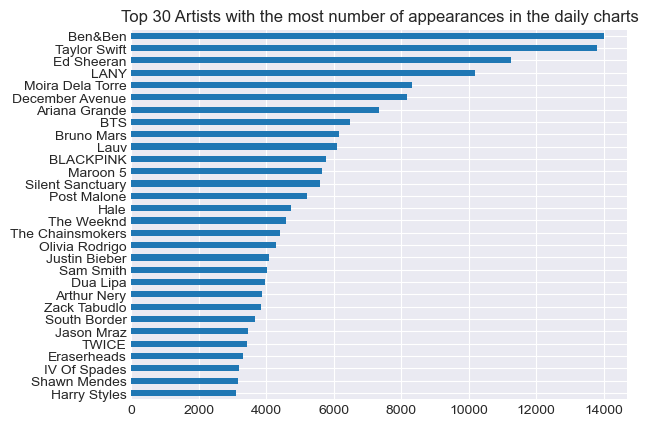

In [45]:
artist_count.plot.barh(title="Top 30 Artists with the most number of appearances in the daily charts").invert_yaxis()

In [46]:
benandben_tracks_count_df = charts_df[charts_df['artist'] == 'Ben&Ben']['track_name'].value_counts()
benandben_tracks_count_df

Kathang Isip                                                1929
Leaves                                                      1887
Maybe The Night                                             1842
Pagtingin                                                   1429
Araw-Araw                                                   1299
Sa Susunod na Habang Buhay                                  1128
Make It With You                                            1069
Lifetime                                                     592
Masyado Pang Maaga                                           447
Ride Home                                                    360
Paninindigan Kita                                            336
Pasalubong - feat. Moira Dela Torre                          317
Di Ka Sayang                                                 225
Nakikinig Ka Ba Sa Akin                                      206
The Ones We Once Loved                                       182
Leaves (feat. Young K)   

In [47]:
print("Total Count: " + str(benandben_tracks_count_df.sum()))

Total Count: 14003


From the table above that shows the frequency of each song made by `Ben & Ben` in the dataset, it can be seen that their song, `Kathang Isip` appeared in the charts for 1929 times in the charts, out of the 2280 days this data collection process was held.

# Result:


The graph created shows a data visualization of the top 30 artists in terms of their frequency in appearing in the Top 200 Spotify PH daily charts from 01/01/2017 to 31/03/2017. As observed, `Ben & Ben` are the mode artist of this dataset, having 14003 appearances in the daily charts throughout the entire duration of the data collection, just above Taylor Swift. This EDA can be used as basis on how a specific arist can be prevalent in the daily charts, which can be translated into categorical data for the association rule mining algorithm to process as well.

## Question 2:
### Is there a correlation between the provided features of a song, namely:

- **`danceability`**: describes how suitable a song is for dancing based on musical elements present in the track specifically the tempo, rhythm stability, beat strength, and overall regularity. It has a value between 0 being the least danceable to 1 being the most danceable.
- **`energy`**: a value between 0 to 1 representing the measure of intensity and activity.
- **`loudness`**: overall (average) loudness of a track in decibels. Values typically range between -60 to 0 db
- **`speechiness`**: a value representing the presence of spoken words detected in a track. It ranges between 0 to 1 where tracks that are exclusively speech-like has a value that is closer to 1.0
- **`acousticness`**: a value between 0 to 1 representing the confidence that the track is acoustic. 1.0 represents high confidence that the track is acoustic
- **`instrumentalness`**: a value between 0 to 1 representing a prediction whether the track has no vocals. The closer the value is to 1.0, the greater likelihood that it has no vocal content.
- **`liveness`**: a value between 0 to 1 representing the presence of an audience detected in the recording. A value above 0.8 provides a strong likelihood that the track is live (performed and recorded in front of an audience).
- **`valence`**: a value between 0 to 1 representing the positiveness conveyed by a track. A value closer to 1.0 represents a positive track (e.g. happy or cheerful) and a value closer to 0.0 represents a negative track (e.g. sad or depressing)
- **`tempo`**: a value representing the overall tempo (speed or pace) of a track in beats per minute (BPM). [Source](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

### with the total number of recorded streams the song has during the timespan of the dataset?

To answer this question, each given variables from the list is tested for correlation with the number of total streams, and determine its relationship, whether it is positive or negative. 

This will help in answering the research question as it is useful for preliminary insights between the one dimensional relationship of a song feature and its overall popularity. The correlation matrix highlights the strong relationships, and can be used as basis for features in the beginning of answering the research question.

In [48]:
corr_df = charts_tracks_df[['track_id', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
corr_df

,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048
...,...,...,...,...,...,...,...,...,...,...
4762,0zWuvPDqBa0WM9Ffwl0rgb,0.799,0.793,-4.938,0.0519,0.0108,0.000001,0.0496,0.467,102.006
4764,6TKDFOO6Rv6VuB9PxcXQO3,0.744,0.572,-9.542,0.2680,0.1520,0.000000,0.0949,0.535,156.071
4765,69CrOS7vEHIrhC2ILyEi0s,0.841,0.384,-7.684,0.0351,0.0236,0.000002,0.0735,0.597,123.961
4766,2YXswOX5aKv6OHRKUcAMLQ,0.779,0.646,-5.884,0.0388,0.0260,0.000027,0.0943,0.628,110.048


In the table above, we can see the values corresponding to a song's features. From the data cleaning part, all duplicates and tracks with NaN were already cleaned. However, the total number of streams per song has not been obtained yet. To do this:

1. Obtain the total streams of each song by aggregating the streams of each track in `charts_df`.
2. This value can now be appended as a new series in `corr_df` by using libraries. 

In [49]:
#Step 1
charts_df_agg = charts_df[['track_id', 'streams']].groupby(['track_id']).sum().reset_index().sort_values(by=['streams'], ascending = False)
charts_df_agg

,track_id,streams
1878,3WUEs51GpcvlgU7lehLgLh,193403246
3079,5uCax9HTNlzGybIStD3vDh,157966745
1046,1yDiru08Q6omDOGkZMPnei,151687708
1160,2BgD4nRyx9EZ5o8YEnjRSV,147756258
803,1X4l4i472kW5ofFP8Xo0x0,138168088
...,...,...
3492,6hmhG1b4LEyNuashVvuIAo,12343
3920,7nD9nN3jord9wWcfW3Gkcm,11300
3995,7x5xYW5W42OGPAdHUyyguy,11209
3436,6bLopGnirdrilrpdVB6Um1,11097


Given this new dataframe, it is now possible to append the total streams of the songs to the dataframe containing all the song features.

In [50]:
#Step 2
corr_df = pd.merge(corr_df, charts_df_agg, on='track_id')
corr_df

,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,streams
0,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152,55764808
1,5uCax9HTNlzGybIStD3vDh,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043,157966745
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010,53598706
3,2rizacJSyD9S1IQUxUxnsK,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000,17537094
4,5MFzQMkrl1FOOng9tq6R9r,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048,17518675
...,...,...,...,...,...,...,...,...,...,...,...
4015,0zWuvPDqBa0WM9Ffwl0rgb,0.799,0.793,-4.938,0.0519,0.0108,0.000001,0.0496,0.467,102.006,452401
4016,6TKDFOO6Rv6VuB9PxcXQO3,0.744,0.572,-9.542,0.2680,0.1520,0.000000,0.0949,0.535,156.071,191931
4017,69CrOS7vEHIrhC2ILyEi0s,0.841,0.384,-7.684,0.0351,0.0236,0.000002,0.0735,0.597,123.961,406800
4018,2YXswOX5aKv6OHRKUcAMLQ,0.779,0.646,-5.884,0.0388,0.0260,0.000027,0.0943,0.628,110.048,324875


After completing all steps, it is now possible to observe the correlation between `streams` and the song features previously stated.

In [51]:
corr_df.corr()[['streams']]

,streams
danceability,-0.029894
energy,-0.138673
loudness,-0.080199
speechiness,-0.074021
acousticness,0.103559
instrumentalness,-0.034747
liveness,-0.051791
valence,-0.050842
tempo,-0.019637
streams,1.000000


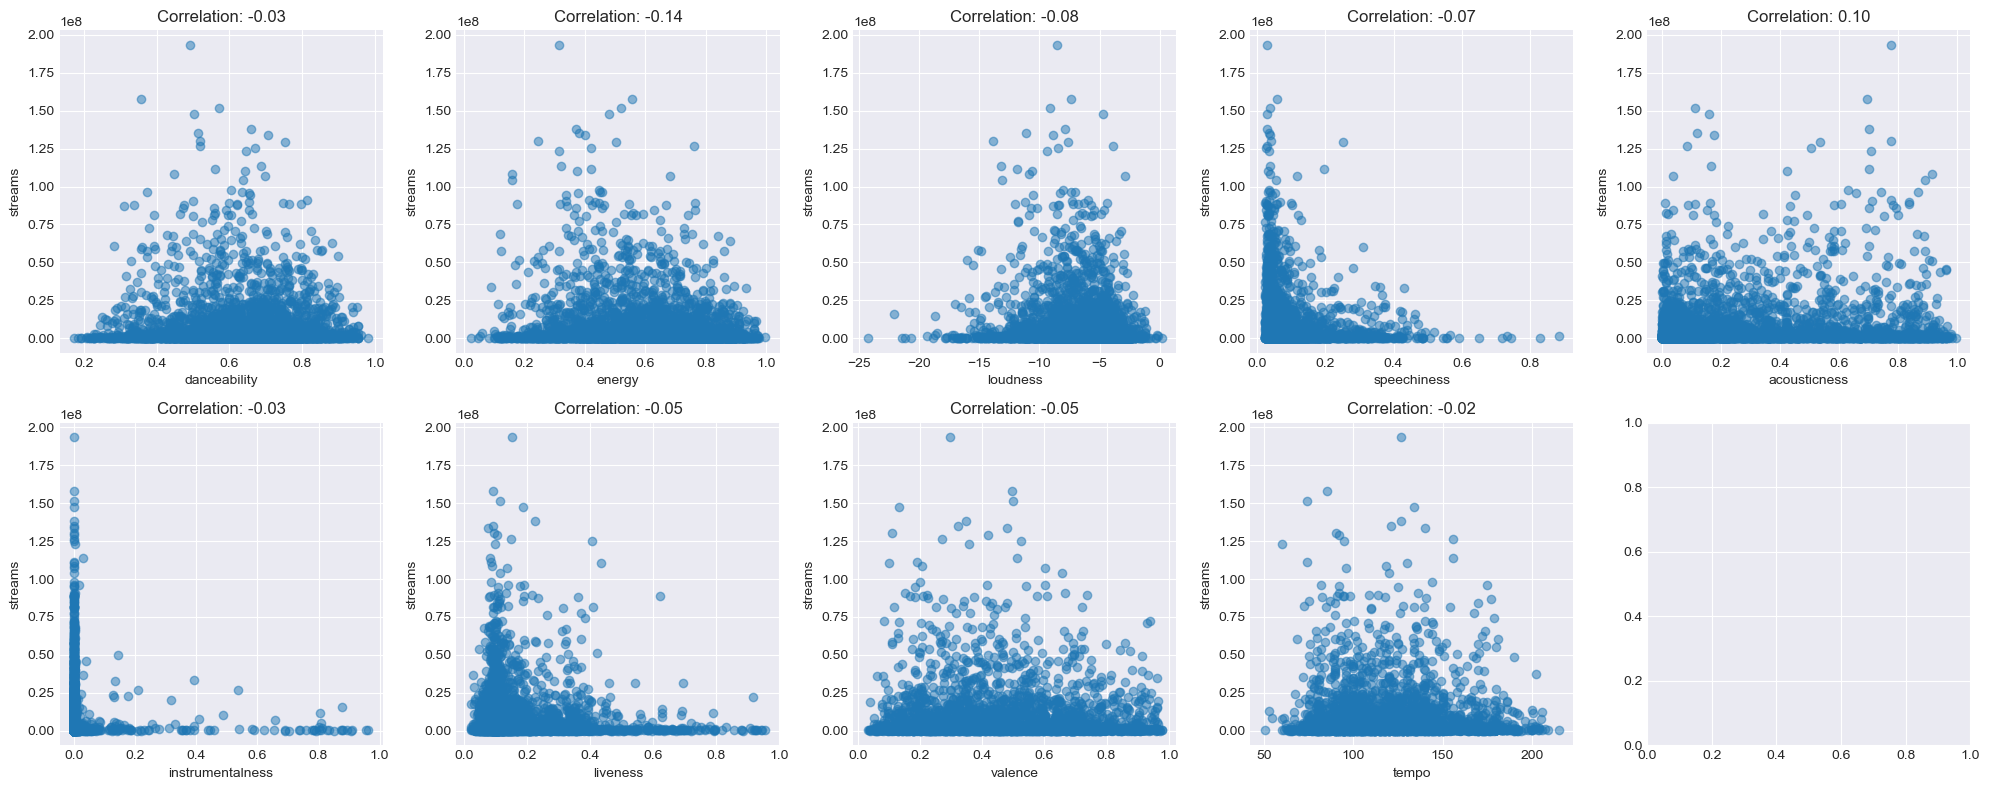

In [52]:
song_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
y_col = 'streams'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, var in enumerate(song_features):
    corr = np.corrcoef(corr_df[var], corr_df[y_col])[0][1]
    axes[i//5, i%5].scatter(corr_df[var], corr_df[y_col], alpha=0.5)
    axes[i//5, i%5].set_xlabel(var)
    axes[i//5, i%5].set_ylabel(y_col)
    axes[i//5, i%5].set_title('Correlation: %.2f'%corr)
plt.tight_layout()
plt.show()

## Results:
### Coefficient Relationships of Song Features with `streams`
1. **Danceability** (-0.03),  **Instrumentalness** (-0.03), **Liveness** (-0.05), **Valence** (-0.05), **Tempo** (-0.02)
    - These song features do not have any correlation with `streams` as their correlation coefficient values are too low to consider any relationship.


2. **Energy** (-0.14), **Acousticness** (0.10), **Loudness** (-0.08), **Speechiness** (-0.07),
    - While these values are still considered weak, they are slightly stronger than the rest of the other song features.

From these results, it would seem in general that there is no correlation with track features with the total number of streams of a track. However, it may still be possible to discover more complex relationships between the features and the number of streams through the use of more complex statistical analyses such as machine learning and association rule mining, as correlation analysis may not provide the patterns that occur within the dataset. 

## Question 3:
### Which genres of music appear most frequently in the daily top 200 charts of the Philippines for each month in the given timespan, and in the overall timespan given?

This question allows us to view the general popular music trends in the Philippines. To do so, songs in **charts_df** will be associated with the genres associated with their respective artist and tallied for every month.


In [53]:
#Create a new dataframe that contains the song from charts_df, attached with the artists genre dataframe
charts_genres_df = charts_df[['year', 'month', 'day', 'track_id', 'artist']].merge(charts_tracks_df[['track_id', 'artist_id']], on='track_id').merge(charts_artists_df, on='artist_id').drop(['total_followers', 'popularity', 'artist', 'artist_name', 'track_id', 'artist_id'], axis=1)
charts_genres_df

,year,month,day,NO_GENRE,a cappella,acoustic cover,acoustic opm,acoustic pop,adult standards,afro r&b,...,virgin islands reggae,virginia hip hop,vispop,vocal house,vocal jazz,west coast rap,westcoast flow,world worship,worship,yacht rock
0,2017,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455903,2023,3,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455904,2023,3,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455905,2023,3,31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455906,2023,3,31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In the table above, we can observe a newly generated dataframe that associates a song with the genres of the artist. This is done as it can be safely assumed that the songs of the artists are also associated with the genres an artist is associated with as well. After this data operation, observations in **charts_genres_df** can be grouped together by year and month, with the total associated genres summed together.

In [54]:
#Group observations and add all genres per month
genres_per_month_df = charts_genres_df.drop(['day'], axis=1).groupby(['year', 'month']).sum()
genres_per_month_df

NO_GENRE  a cappella  acoustic cover  acoustic opm  acoustic pop  \
year month                                                                     
2017 1           157           0               0             0           109   
     2            98           0               0             1           118   
     3            88           0               0             0           122   
     4            47           0               0             0           138   
     5            20           0               0             0           116   
     6            27           0               0             0           118   
     7            21           0               0             0           123   
     8             6           0               0            13           142   
     9             5           0               0             0           142   
     10            0           0               0             0           119   
     11            0           0               0             0           117   
     12           20           2               0             0           109   
2018 1             0           0               0             0           121   
     2             1           0               0             0           109   
     3            14           0               0             0           119   
     4            13           0               0             0           113   
     5             7           0               0             0           133   
     6             2           0               0             0           119   
     7            25           0              15             2           116   
     8            11           0               7             4           138   
     9            10           0               5             2           132   
     10            3           0               0             3           125   
     11           30           0               0             0           111   
     12           60           1               0             2            69   
2019 1            62           0               0             0            90   
     2            56           0               0             0            80   
     3            41           0               0             1            73   
     4            31           0               0             0            60   
     5            58           0               0             0            62   
     6            15           0               0             0            61   
     7            36           0               0            29            62   
     8             0           0               0            31            63   
     9             0           0               0            30            82   
     10            0           0               0            31            70   
     11           17           0               0            20            60   
     12           59           0               0            19            55   
2020 1            10           0               0            10            62   
     2             0           0               0            29            57   
     3             0           0               0            31            60   
     4            18           0               0            46            95   
     5            92           0               0            31           135   
     6            31           0               0            16           139   
     7            77           0               0            31           138   
     8            72           0               0            54           151   
     9            31           0               0            60           120   
     10            0           0               0            59           124   
     11           10           0               0            45           119   
     12           46           0               0            54            93   
2021 1      

These datasets can then be visualized into bar graphs. One approach would be bar graphs for each month showing the top 10 most frequently appearing genres of music in the daily top 200 in the Philippines.

In [55]:
unique_genres_freq_per_month = []

for year in range(2017, 2024):
    max_months = 13
    if year == 2023:
        max_months = 4
    
    #Loop through the entries per month and year in charts_genres_df
    for month in range(1, max_months):
        query = "year == " + str(year) + "& month == " + str(month)

        #genre_freq_per_month_df = pd.Series(data=, name="genre_freq").to_frame()
        #pd.concat([unique_genres_df, pd.Series(data=genres_per_month_df.query(query).transpose(), name="genre_freq").to_frame()])

        genre_freq_per_month_df = genres_per_month_df.query(query).transpose()

        genre_freq_per_month_df.index.name = 'genre_name'
        genre_freq_per_month_df.columns = ["genre_freq"]

        genre_freq_per_month_df = genre_freq_per_month_df.sort_values(by=['genre_freq'], ascending=False)

        unique_genres_freq_per_month.append(genre_freq_per_month_df)

In [56]:
#Separate the list per year
genre_year_months = [unique_genres_freq_per_month[i:i + 12] for i in range(0, len(unique_genres_freq_per_month), 12)]

## Top 5 Genres per month, every year from 2017 to 2023

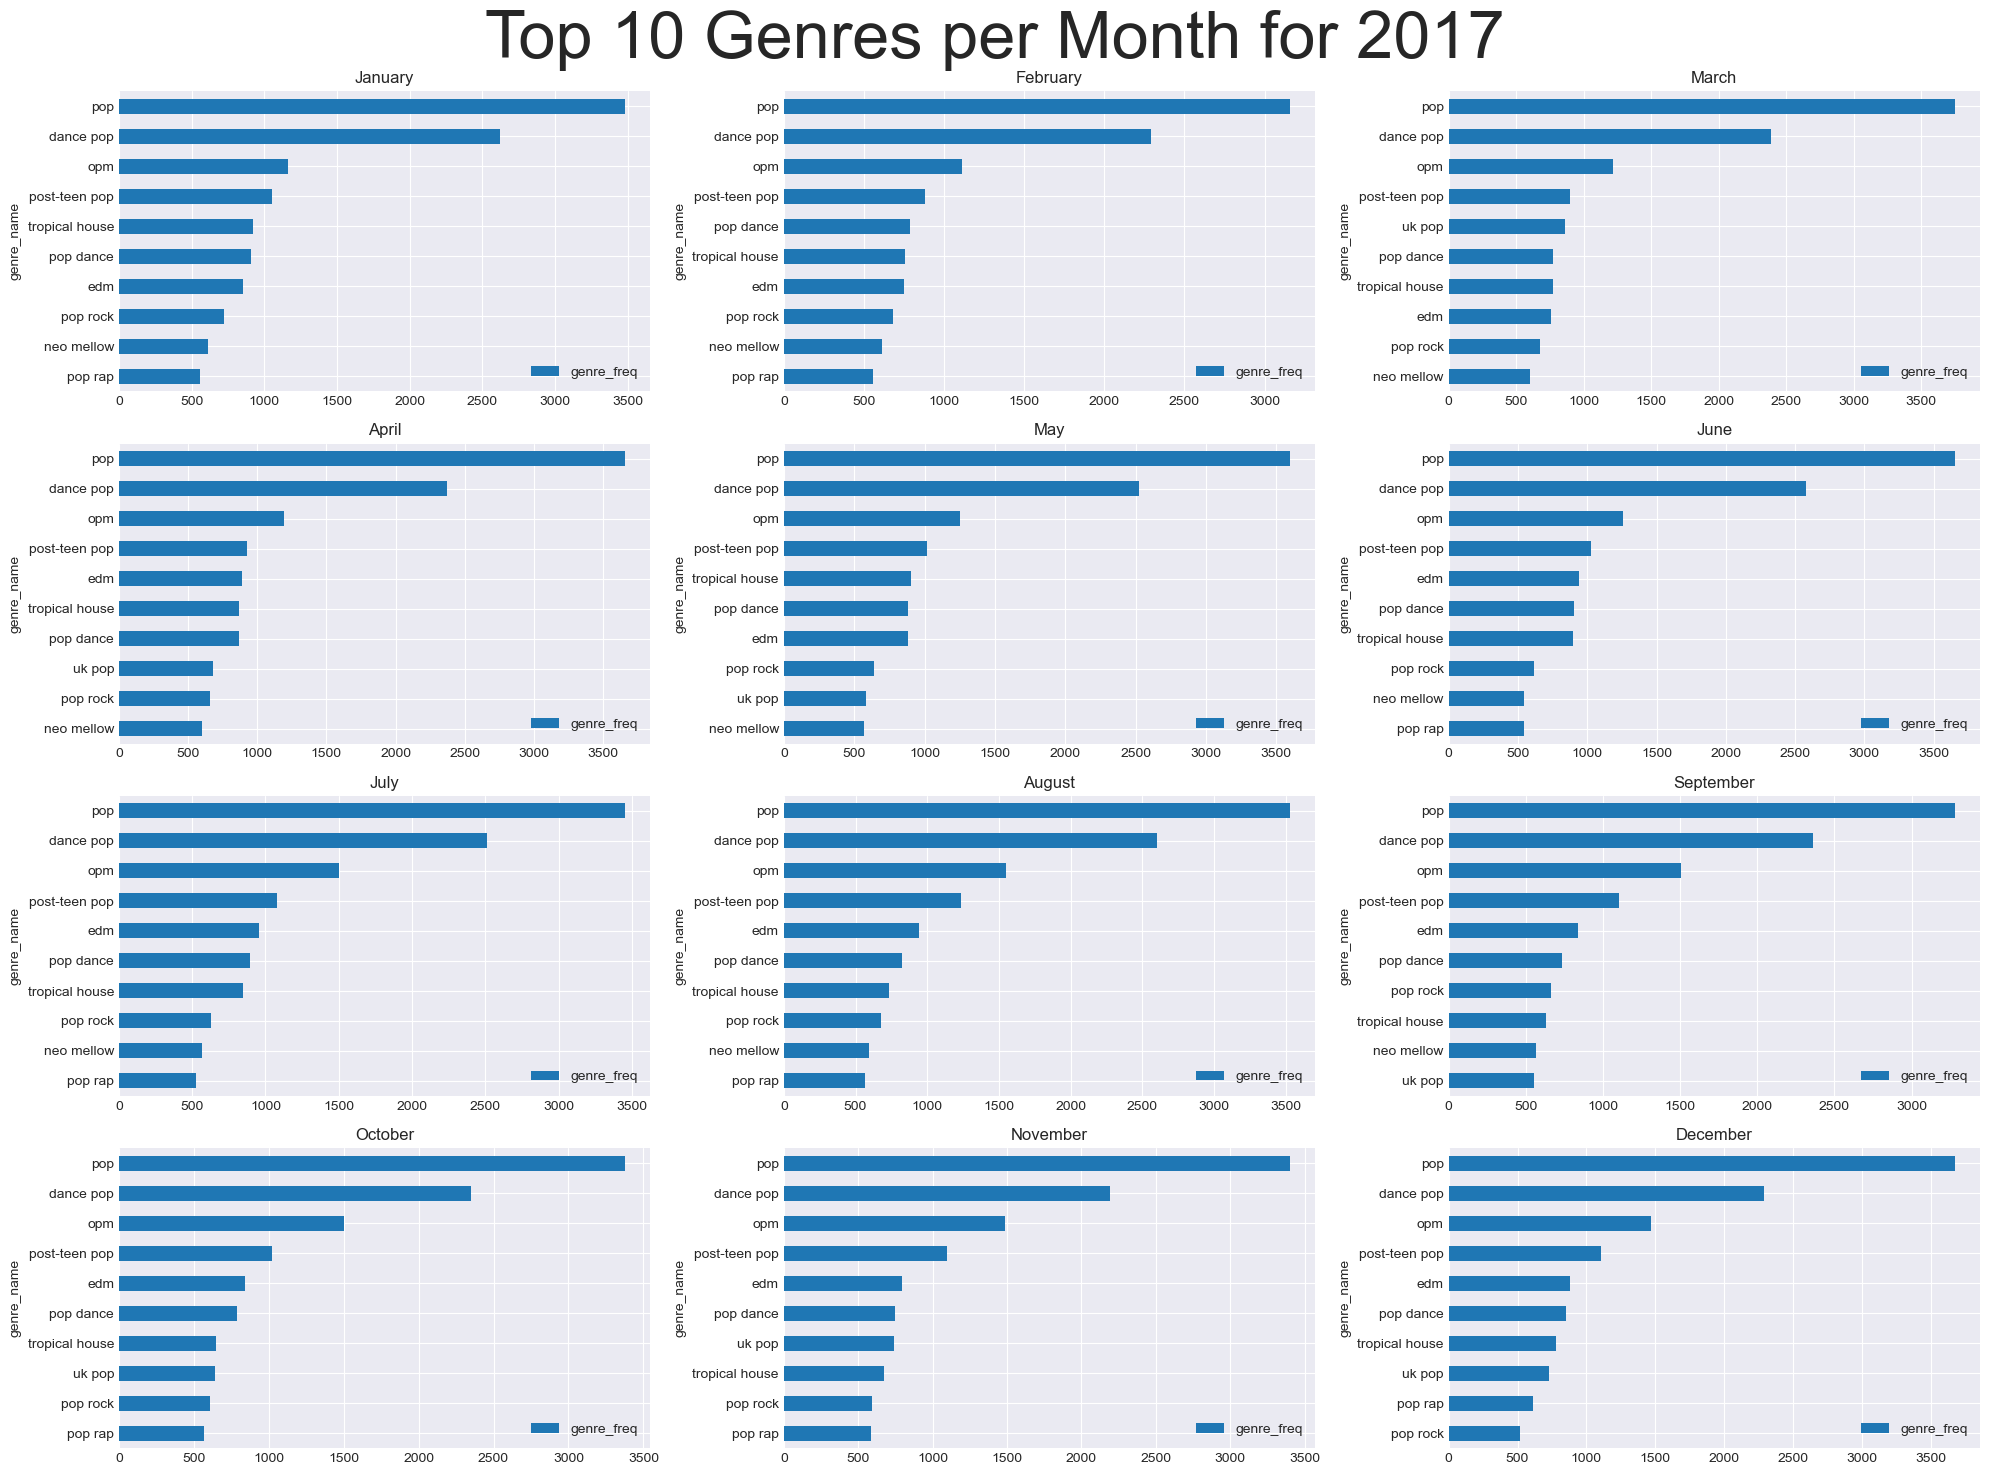

In [57]:
Months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i, genre_month in enumerate(genre_year_months[0]):
    genre_month.head(10).plot.barh(ax=axes[i//3, i%3], title= str(Months[i]), legend=True).invert_yaxis()

fig.suptitle("Top 10 Genres per Month for 2017", fontsize=48)
plt.tight_layout()
plt.show()

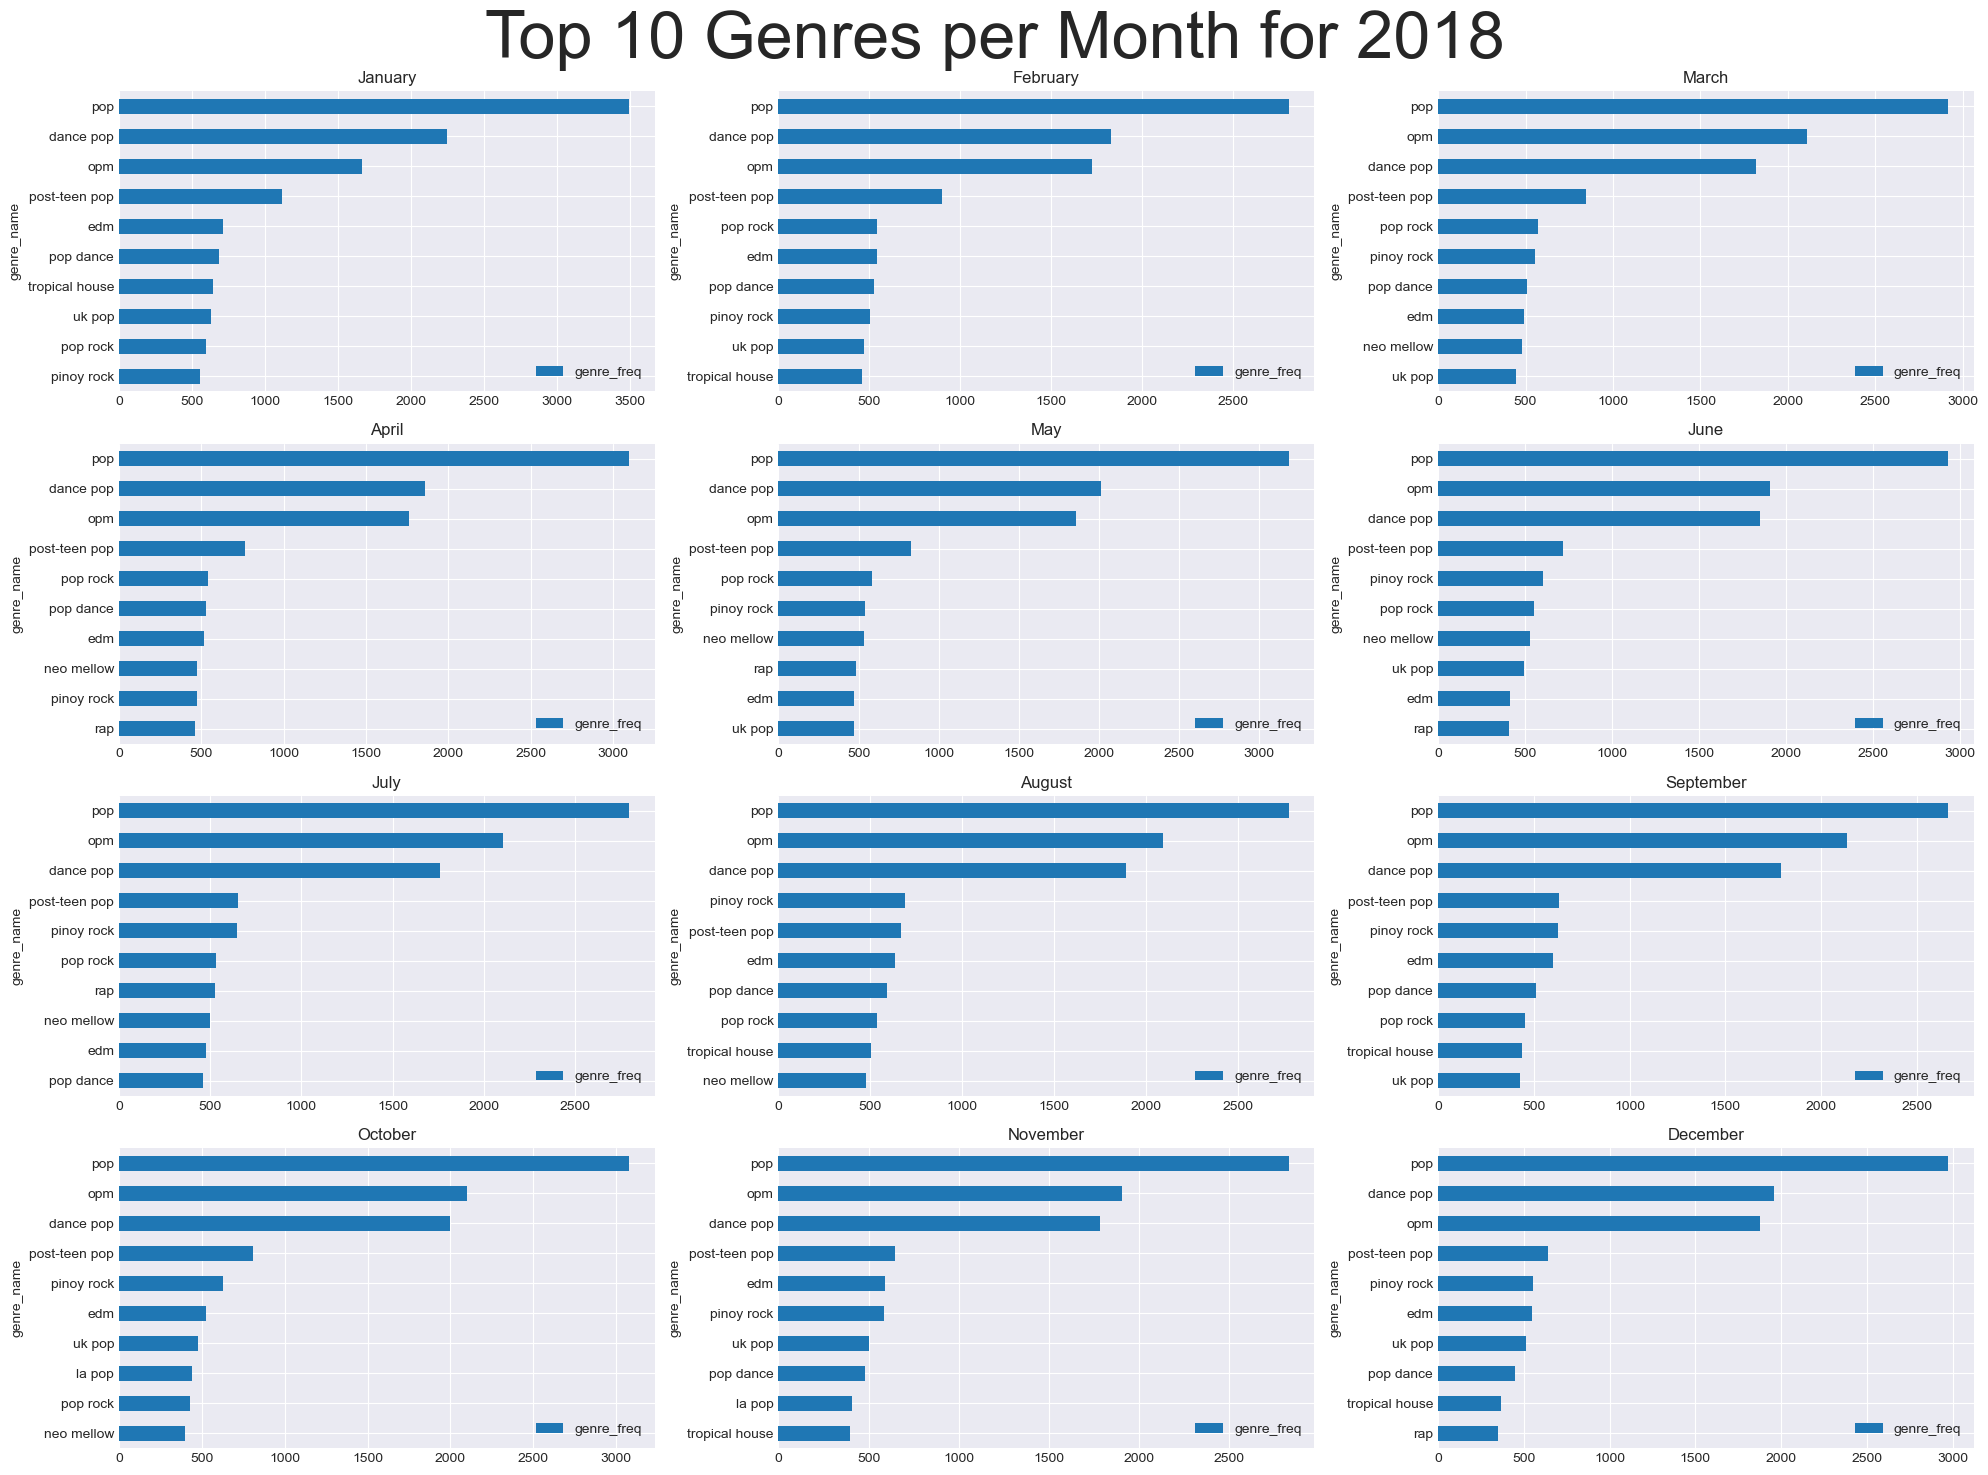

In [58]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i, genre_month in enumerate(genre_year_months[1]):
    genre_month.head(10).plot.barh(ax=axes[i//3, i%3], title= str(Months[i]), legend=True).invert_yaxis()

fig.suptitle("Top 10 Genres per Month for 2018", fontsize=48)
plt.tight_layout()
plt.show()

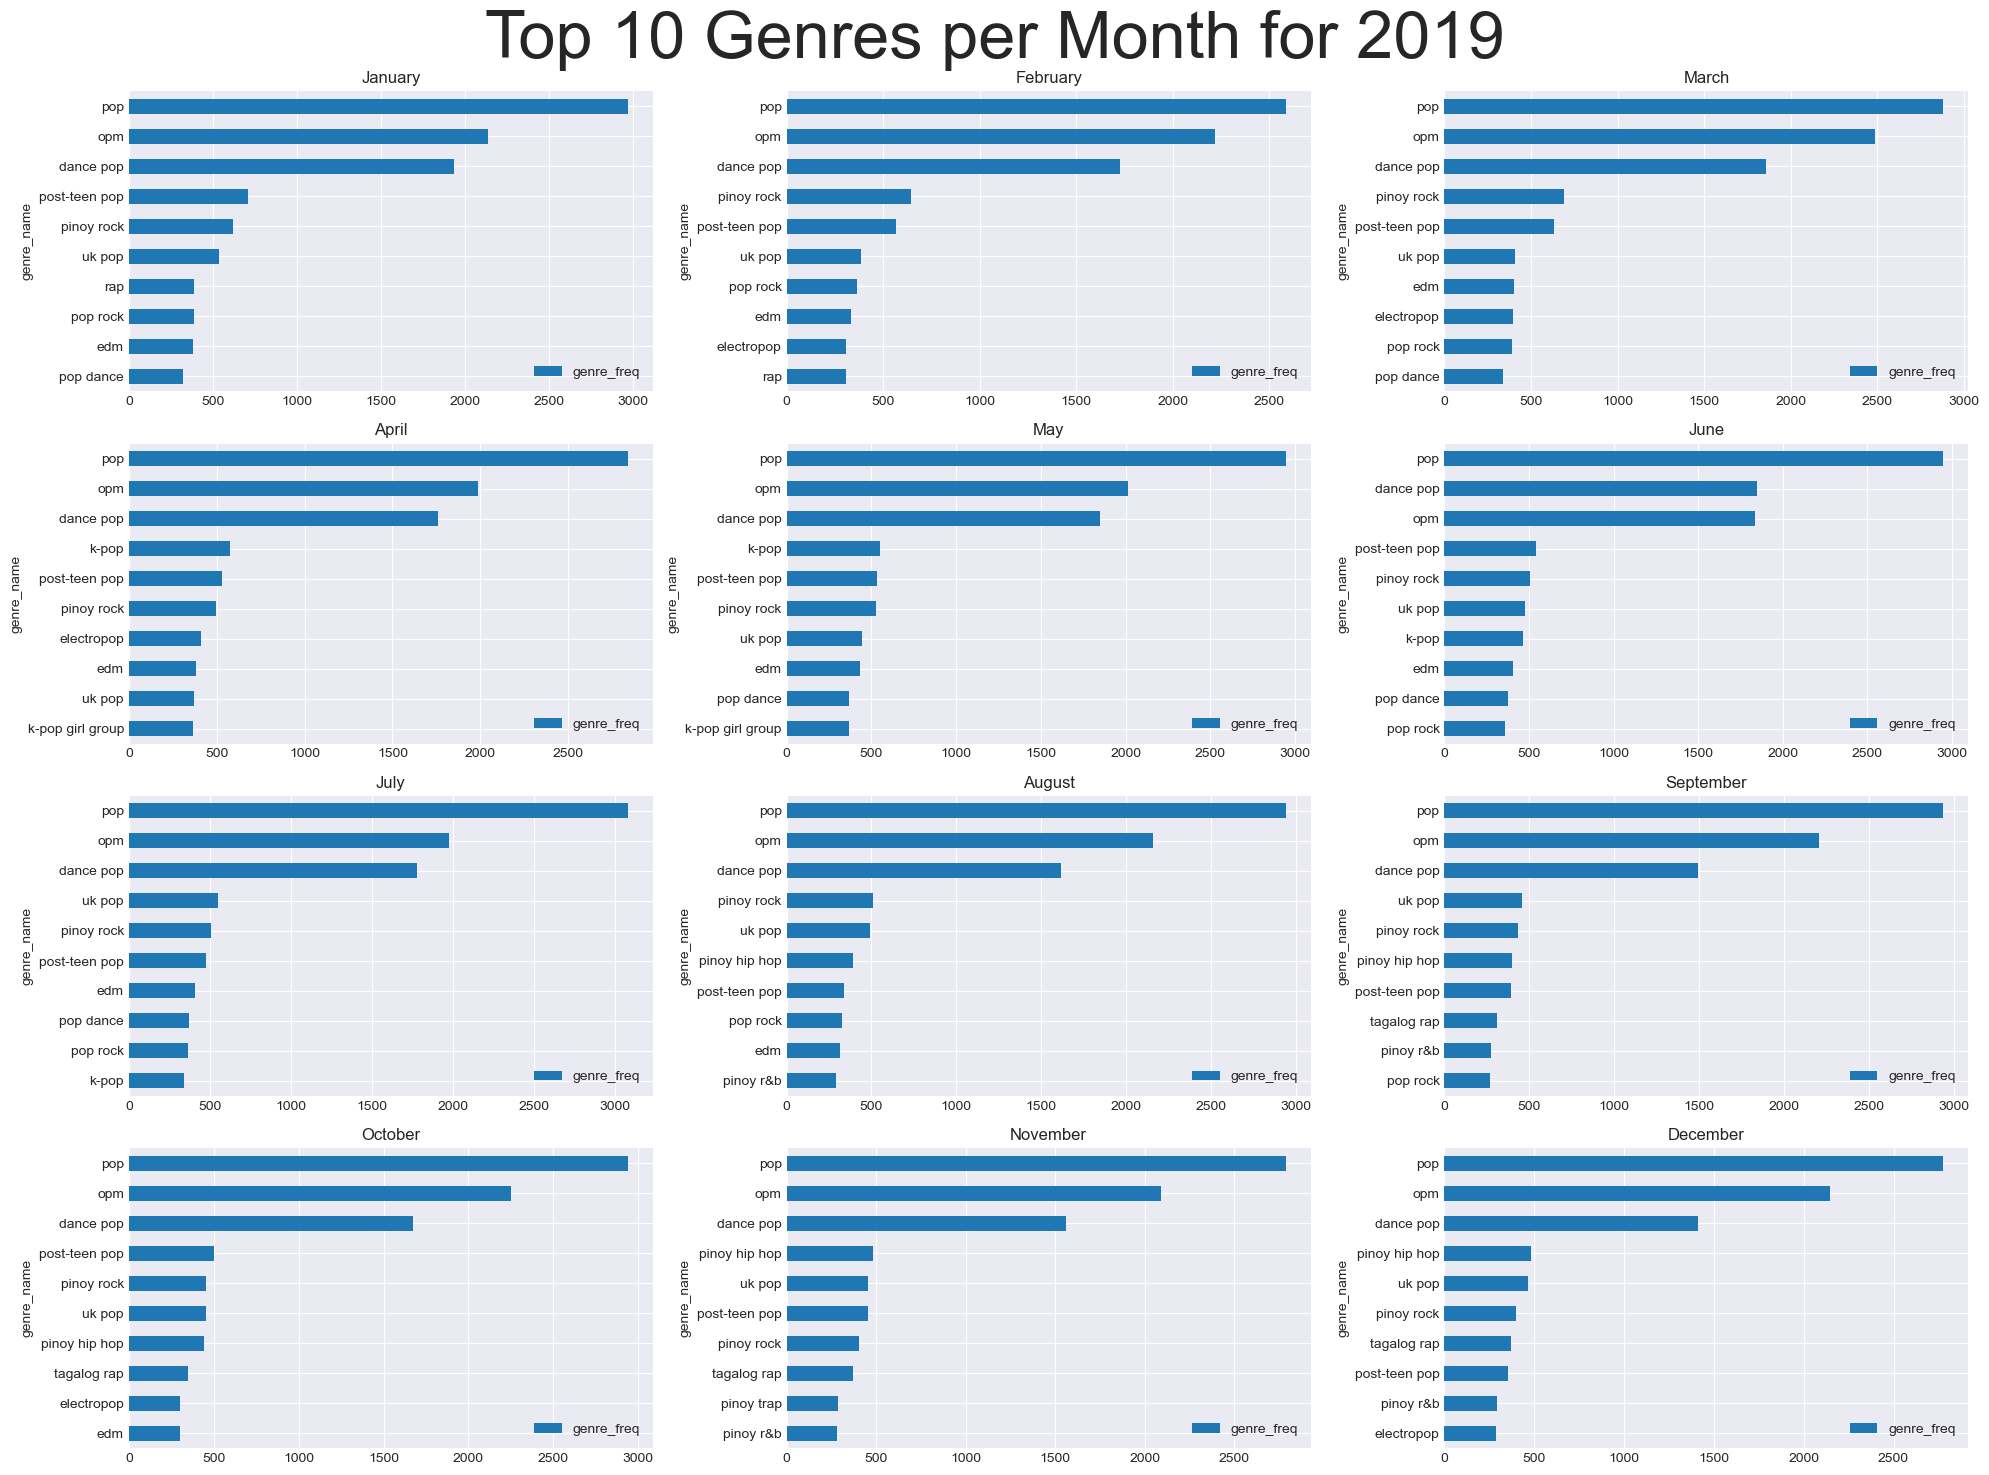

In [59]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i, genre_month in enumerate(genre_year_months[2]):
    genre_month.head(10).plot.barh(ax=axes[i//3, i%3], title= str(Months[i]), legend=True).invert_yaxis()

fig.suptitle("Top 10 Genres per Month for 2019", fontsize=48)
plt.tight_layout()
plt.show()

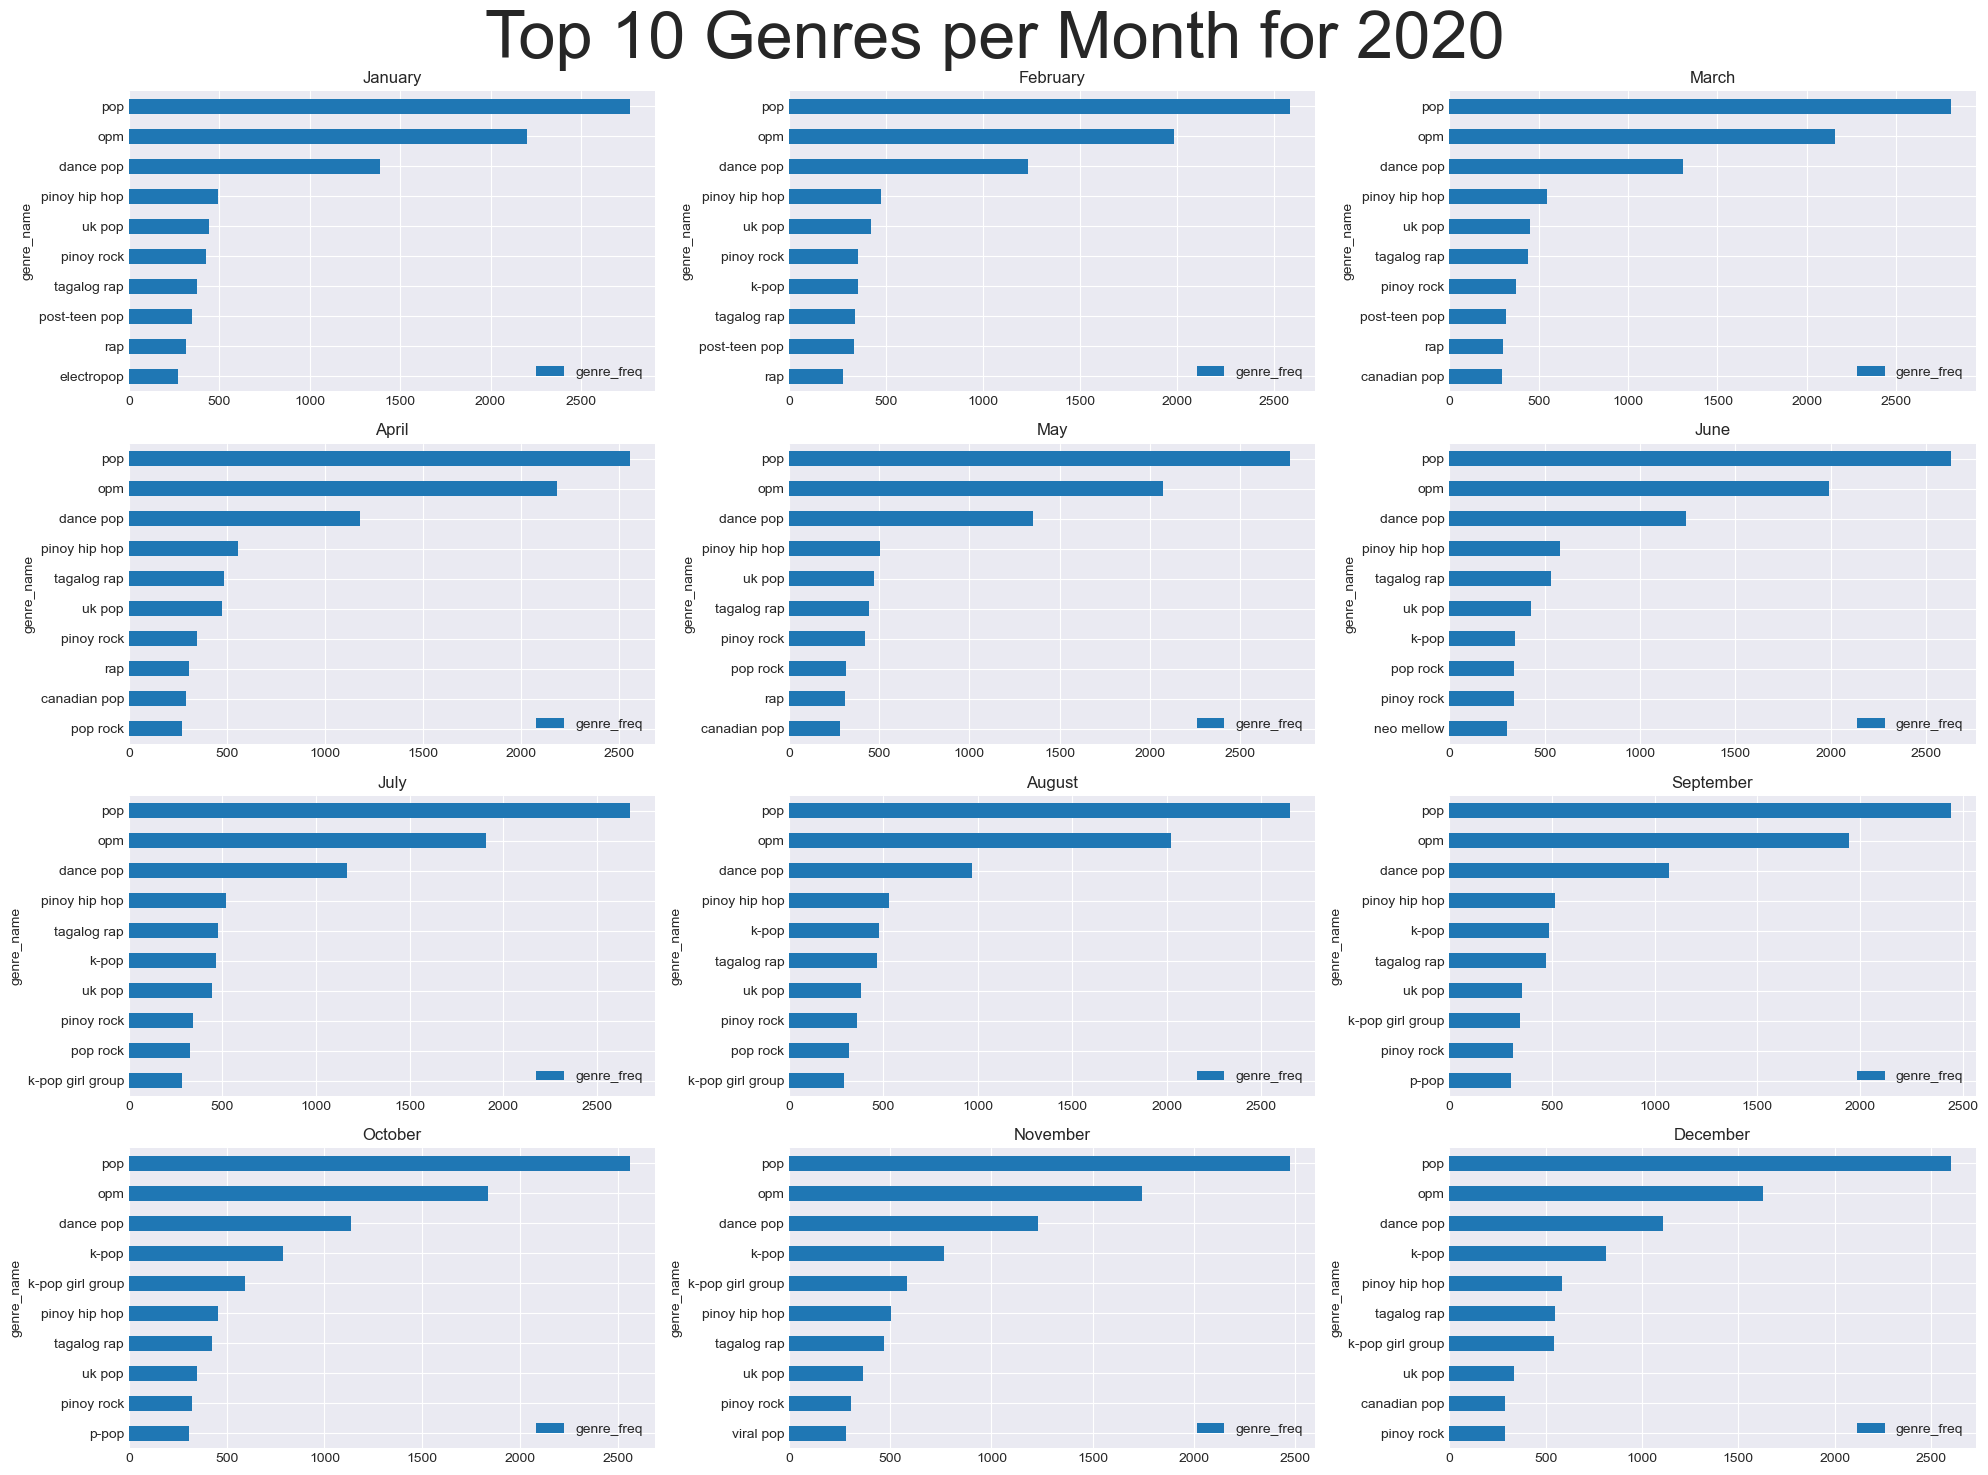

In [60]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i, genre_month in enumerate(genre_year_months[3]):
    genre_month.head(10).plot.barh(ax=axes[i//3, i%3], title= str(Months[i]), legend=True).invert_yaxis()

fig.suptitle("Top 10 Genres per Month for 2020", fontsize=48)
plt.tight_layout()
plt.show()

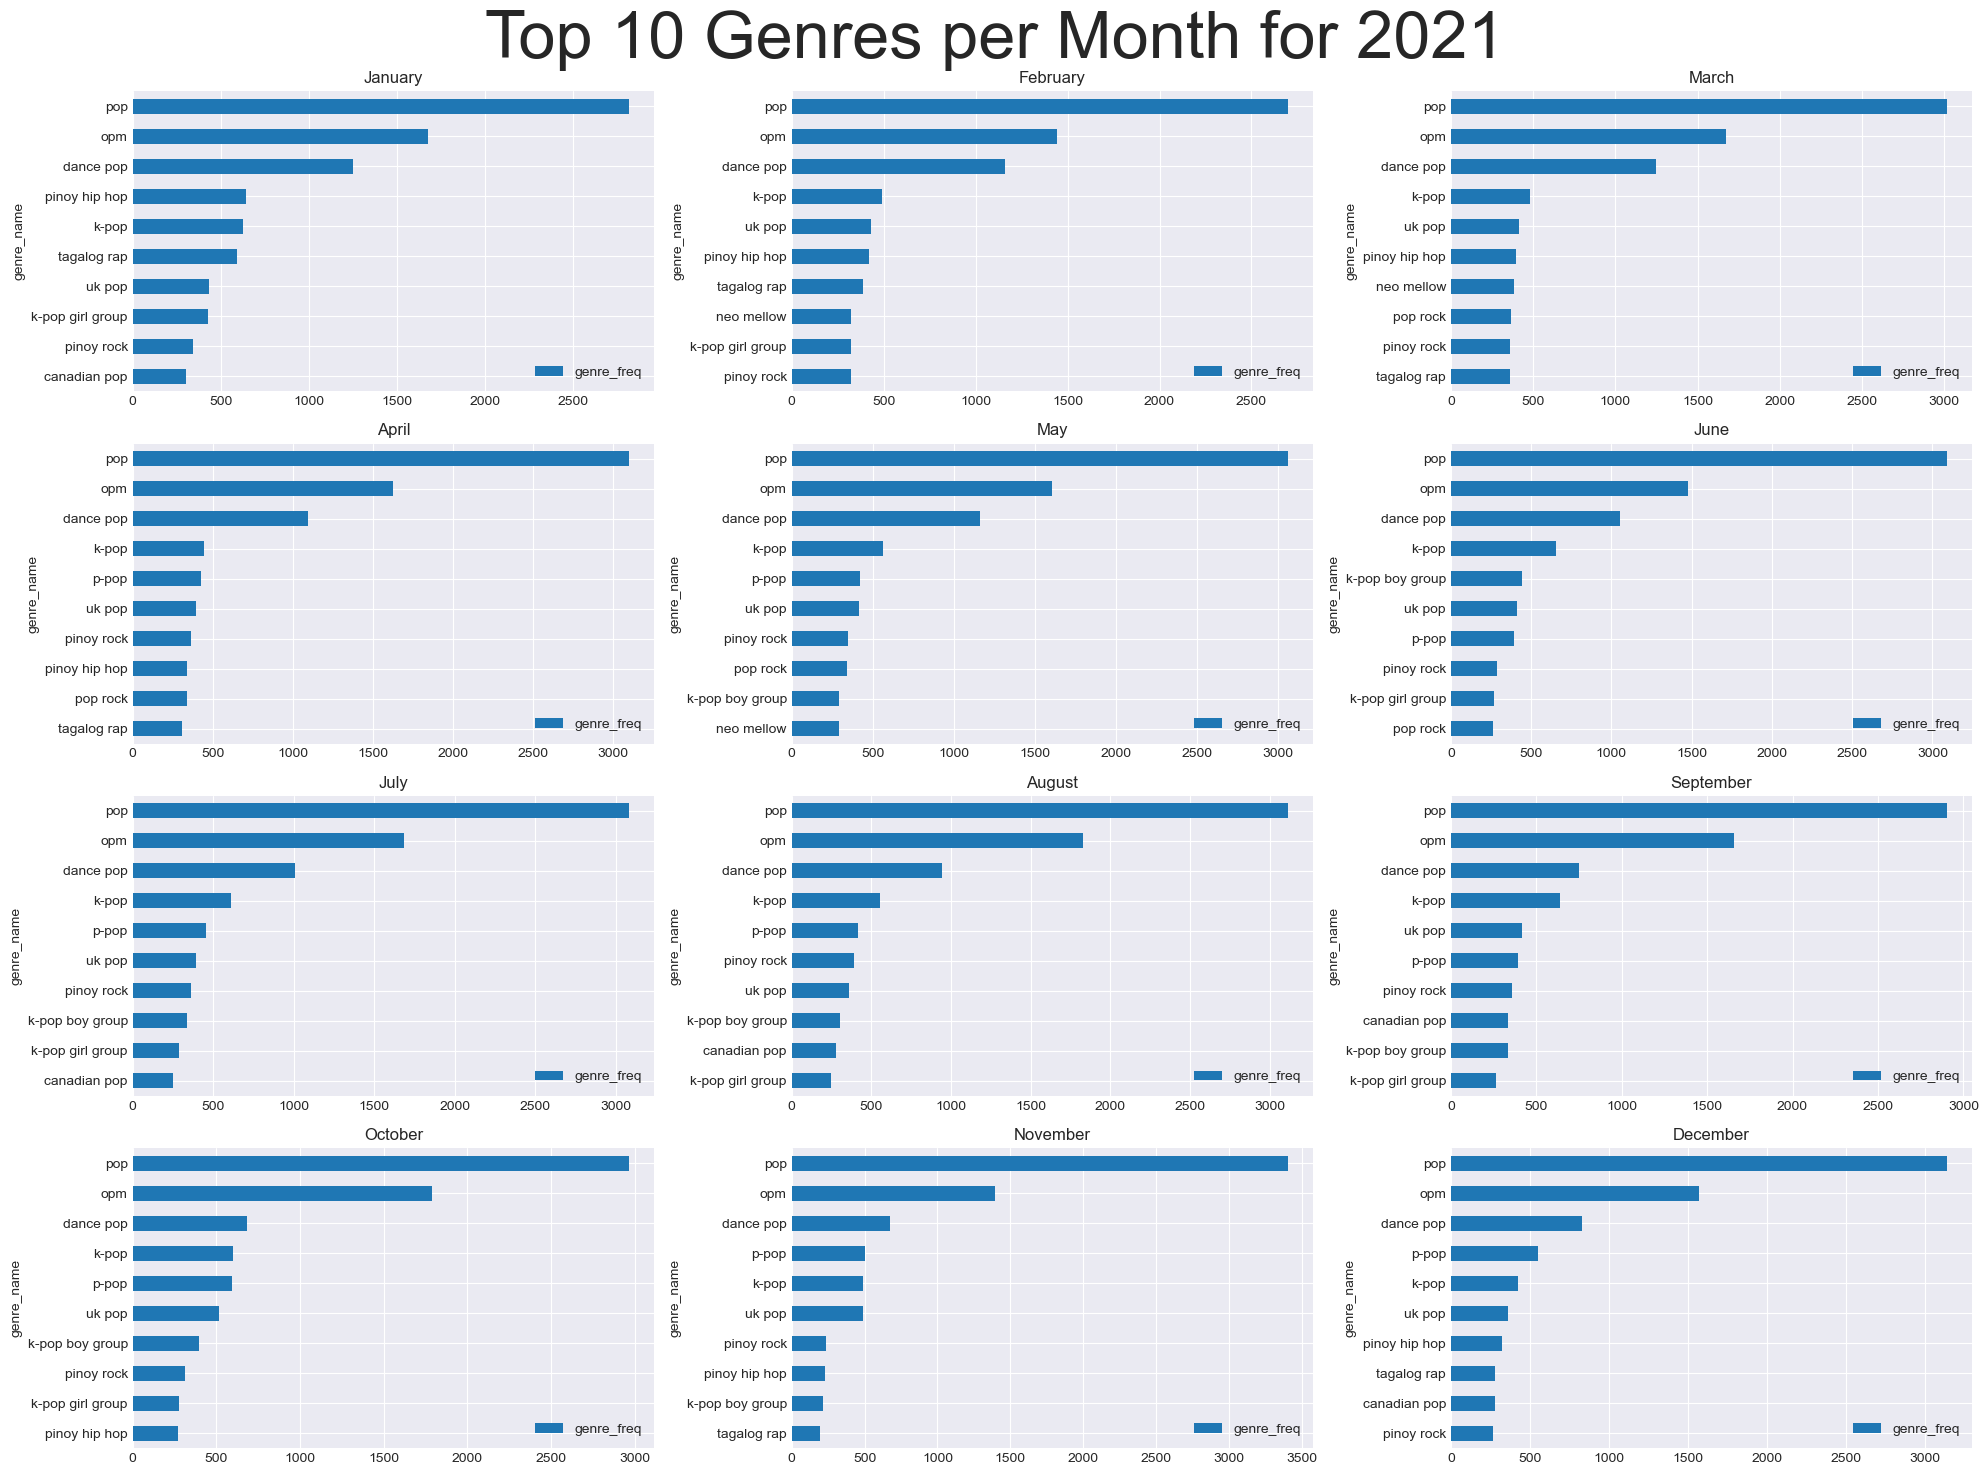

In [61]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i, genre_month in enumerate(genre_year_months[4]):
    genre_month.head(10).plot.barh(ax=axes[i//3, i%3], title= str(Months[i]), legend=True).invert_yaxis()

fig.suptitle("Top 10 Genres per Month for 2021", fontsize=48)
plt.tight_layout()
plt.show()

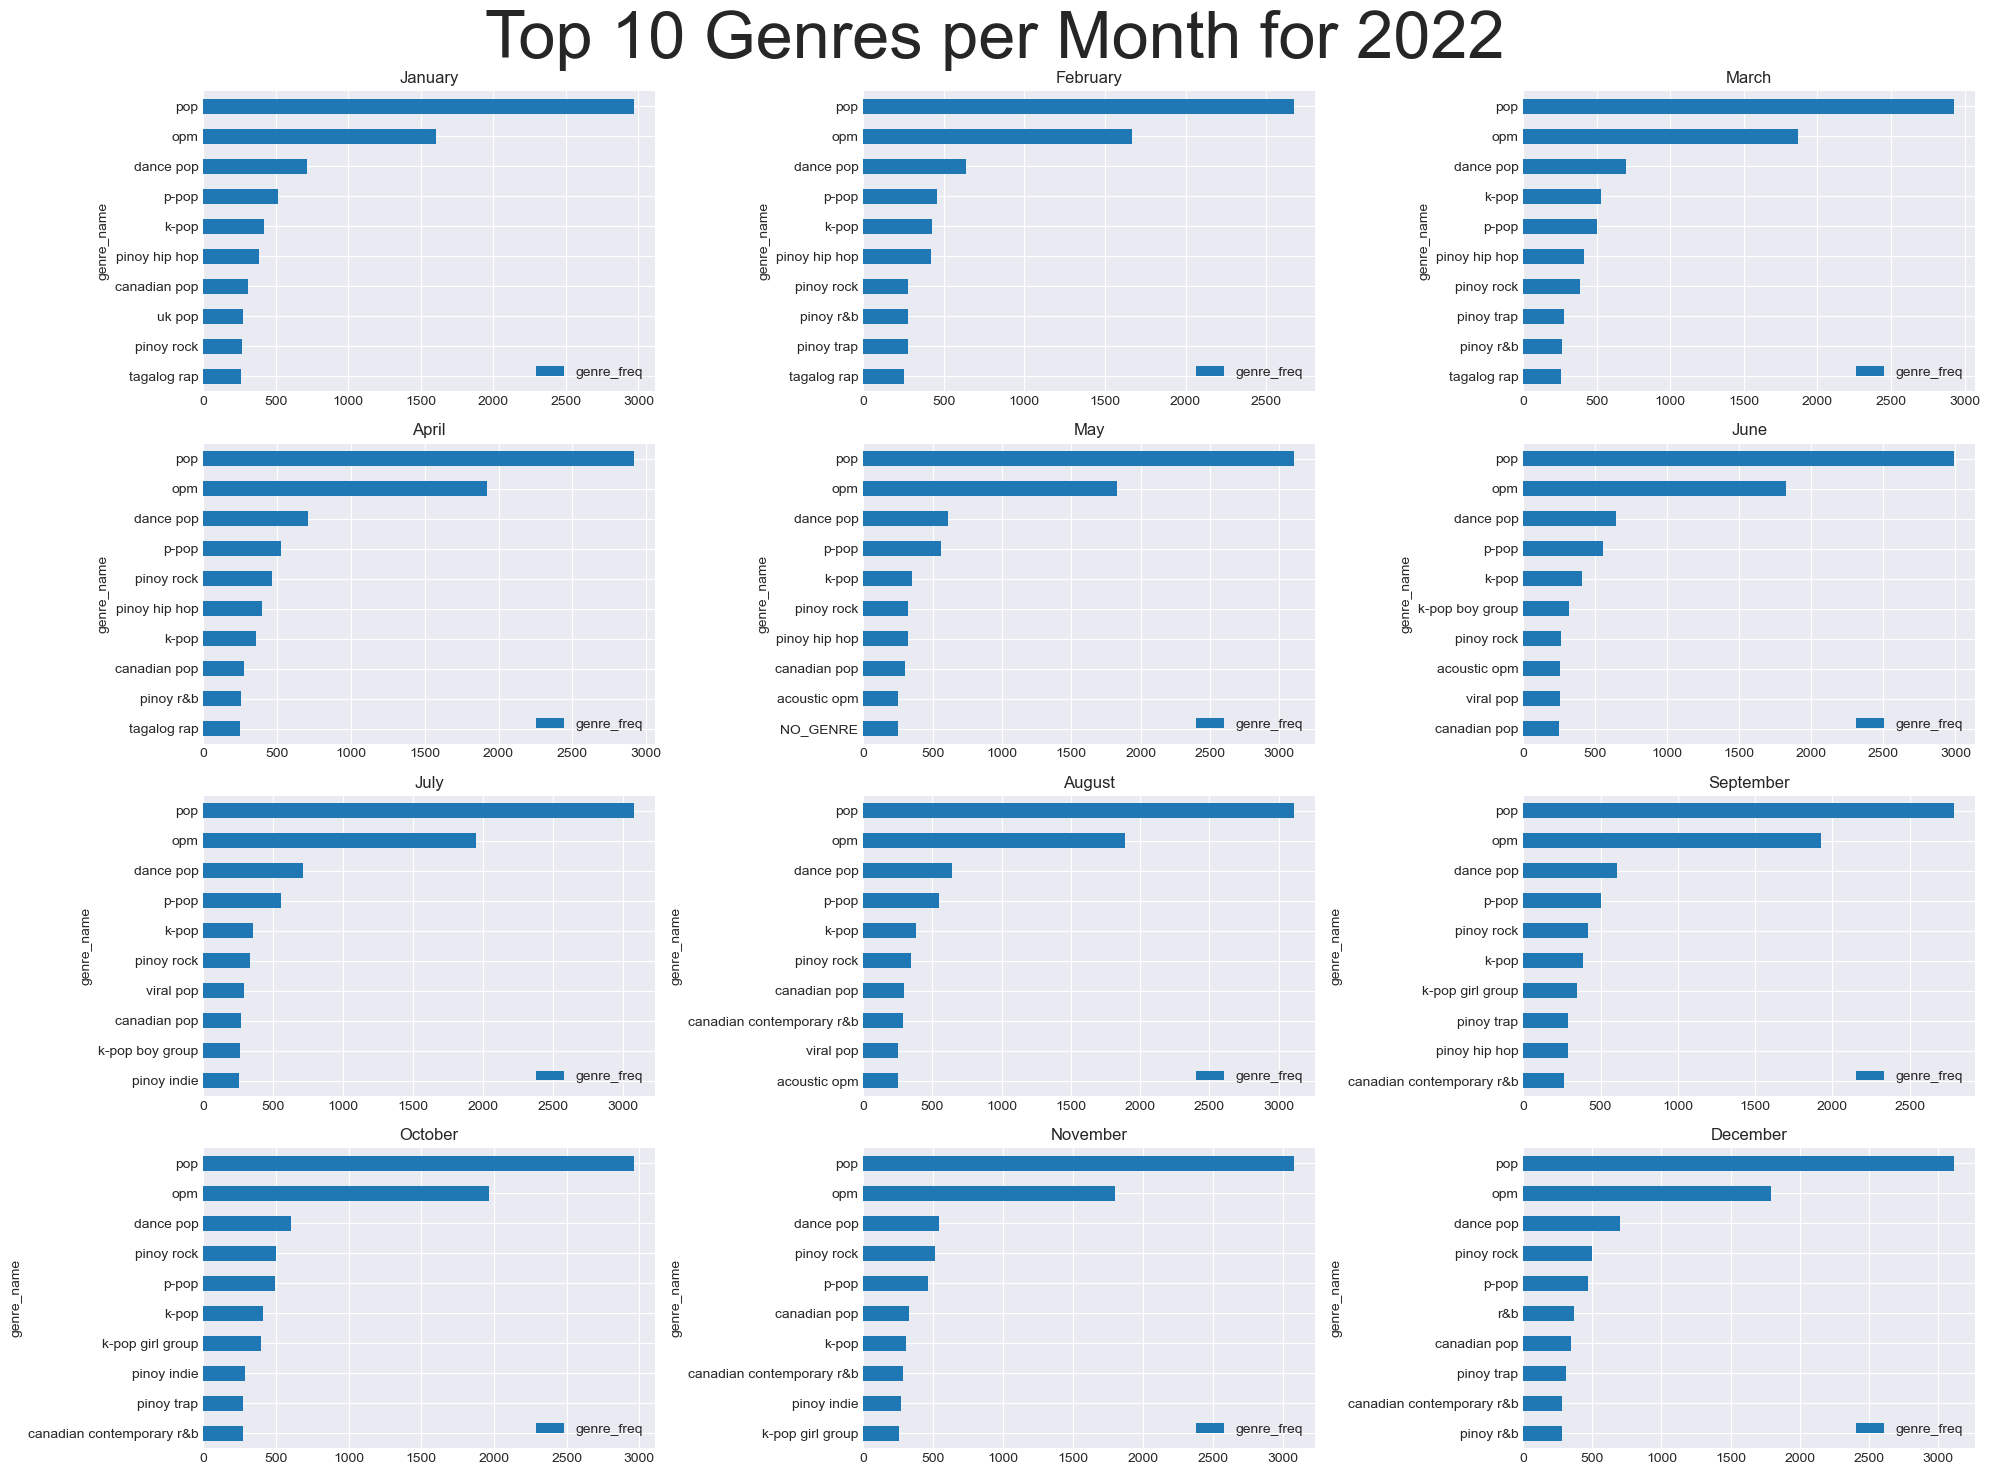

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i, genre_month in enumerate(genre_year_months[5]):
    genre_month.head(10).plot.barh(ax=axes[i//3, i%3], title= str(Months[i]), legend=True).invert_yaxis()

fig.suptitle("Top 10 Genres per Month for 2022", fontsize=48)
plt.tight_layout()
plt.show()

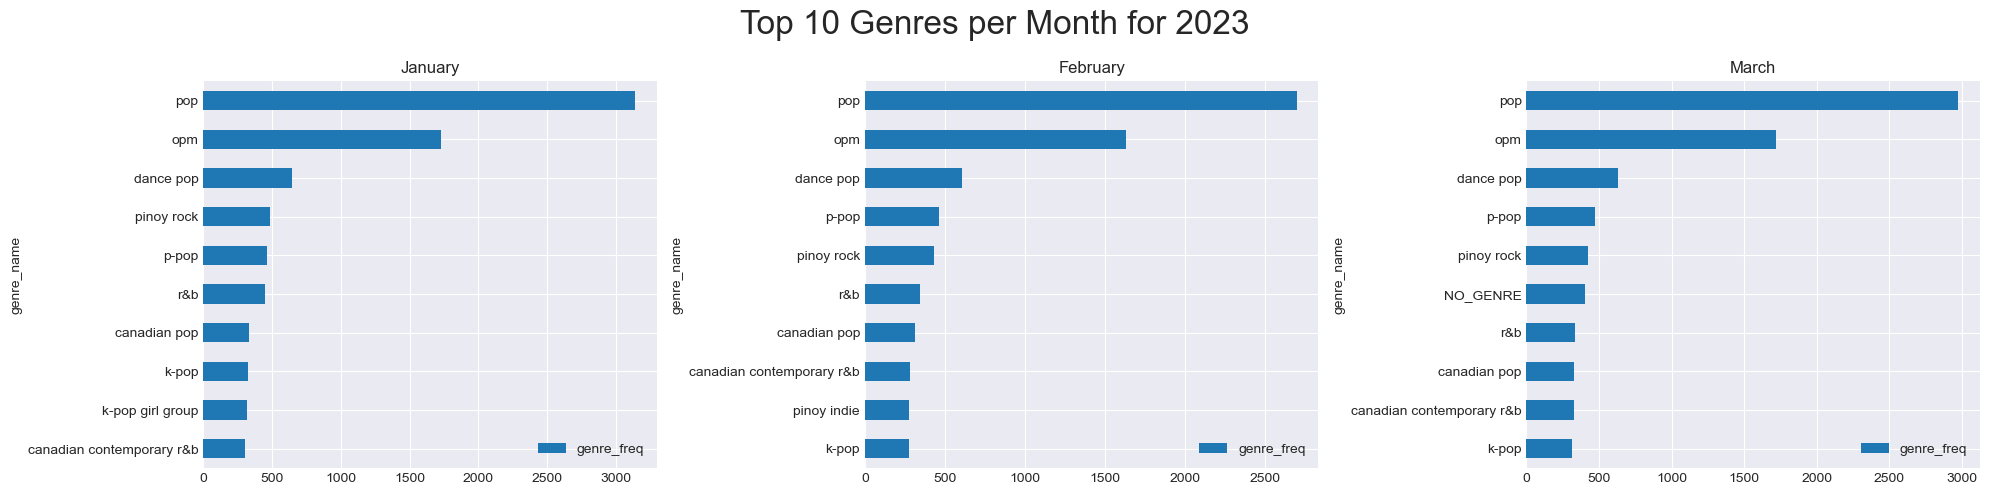

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

#only until march
for i, genre_month in enumerate(genre_year_months[6]):
    genre_month.head(10).plot.barh(ax=axes[i], title= str(Months[i]), legend=True).invert_yaxis()

fig.suptitle("Top 10 Genres per Month for 2023", fontsize=24)
plt.tight_layout()
plt.show()

## Results:
### Most Frequent Genres by month

The top 10 most frequent genres per month usually stayed the same throughout the given timespan. Genres that can be commonly found in the graphs include: k-pop, p-pop, pinoy rock, and the top 3 genres that stayed as the top 3 throughout the entire time span: pop, opm, and dance pop.

These 3 genres: pop, opm, and dance pop could be said to have stayed in the top 3 spots throughout the entire timespan may be due to the broadness of music that they cover, as the 'pop' genre may also be placed to encompass other types of pop as well, like k-pop, p-pop, and canadian pop. This may also be the same reason why pop remained as the top 1 most frequent genre of song to appear in the daily top 200 charts in the Philippines during the given time period.

Additionally, one interesting thing to note is how dance pop remained dominantly as the top 2 spot from January 2017 to June 2018, until opm took the top 2 spot more frequently from June 2018 to March 2023, which may indicate a rising interest for songs that fall under the opm genre.

In [64]:
genres_all_df = charts_genres_df.drop(['day', 'year', 'month'], axis=1).groupby(level=0).all().sum().sort_values()
genres_all_df.index.name = 'genre_name'
genres_all_df.columns = ["genre_freq"]
genres_all_df = genres_all_df.sort_values(ascending=False)
genres_all_df

genre_name
pop                              224631
opm                              135184
dance pop                        108326
post-teen pop                     34694
pinoy rock                        31807
uk pop                            30953
pop rock                          24973
k-pop                             24098
edm                               23360
pop dance                         22833
neo mellow                        21042
pinoy hip hop                     20415
tropical house                    19661
rap                               19456
p-pop                             19289
tagalog rap                       16543
canadian pop                      15876
electropop                        15521
pop rap                           14995
viral pop                         14730
k-pop girl group                  14034
pinoy r&b                         12448
pinoy indie                       11783
pinoy reggae                      10841
pinoy trap                   

### Most Frequent Genres for the whole timespace

The top 10 most frequent genres in the whole time period are such:
1. pop - 224631 appearances
2. opm - 13518 appearances
3. dance pop - 108326 appearances
4. post-teen pop - 34694 appearances
5. pinoy rock - 31807 appearances
6. uk pop - 30953 appearances
7. pop rock - 24973 appearances
8. k-pop - 24098 appearances
9. edm - 23360 appearances
10. pop dance - 22833 appearances

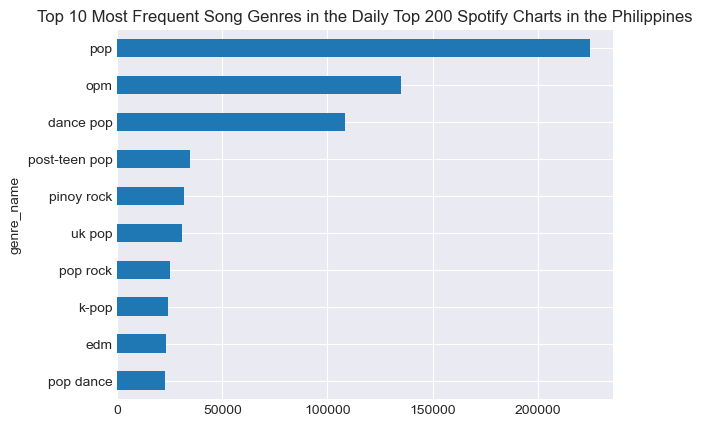

In [65]:
genres_all_df.head(10).plot.barh(title="Top 10 Most Frequent Song Genres in the Daily Top 200 Spotify Charts in the Philippines").invert_yaxis()

The trends seen in the overall time period are very similar to that seen for every month, with the top 3 positions being the same 3 genres mentioned before.

Findings from this EDA Question naturally raises another questions that may be answered through additional EDA:

## Question 4:
### What song genres can be correlated with a high number of streams?

To perform this operation, we would again need to create a new dataframe that contains all of the charts in the daily top 200, associated with the genres of the artist.

In [66]:
#Create a new dataframe that contains the song from charts_df, attached with the artists genre dataframe
charts_genres_streams_df = charts_df[['streams', 'track_id', 'artist']].merge(charts_tracks_df[['track_id', 'artist_id']], on='track_id').merge(charts_artists_df, on='artist_id').drop(['total_followers', 'popularity', 'artist', 'artist_name', 'artist_id'], axis=1)
charts_genres_streams_df

,streams,track_id,NO_GENRE,a cappella,acoustic cover,acoustic opm,acoustic pop,adult standards,afro r&b,afrofuturism,...,virgin islands reggae,virginia hip hop,vispop,vocal house,vocal jazz,west coast rap,westcoast flow,world worship,worship,yacht rock
0,185236,0kN8xEmgMW9mh7UmDYHlJP,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,218117,0kN8xEmgMW9mh7UmDYHlJP,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,237065,0kN8xEmgMW9mh7UmDYHlJP,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,238409,0kN8xEmgMW9mh7UmDYHlJP,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,244616,0kN8xEmgMW9mh7UmDYHlJP,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455903,83713,0XfEJcbDfXVpEkVc1kTXUZ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455904,85161,0XfEJcbDfXVpEkVc1kTXUZ,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455905,406800,69CrOS7vEHIrhC2ILyEi0s,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455906,324875,2YXswOX5aKv6OHRKUcAMLQ,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**charts_genres_streams_df** can then be grouped together according to *track_id*, with the number of streams summed together.

In [67]:
#Group observations and add all genres per month
genres_total_streams_df = charts_genres_streams_df[['track_id', 'streams']].groupby(['track_id']).sum().sort_values(['streams'], ascending=False)
genres_total_streams_df = genres_total_streams_df.merge(charts_tracks_df[['track_id', 'artist_id']], on='track_id').merge(charts_artists_df, on='artist_id').drop(['total_followers', 'popularity', 'artist_name', 'artist_id'], axis=1)
genres_total_streams_df

,track_id,streams,NO_GENRE,a cappella,acoustic cover,acoustic opm,acoustic pop,adult standards,afro r&b,afrofuturism,...,virgin islands reggae,virginia hip hop,vispop,vocal house,vocal jazz,west coast rap,westcoast flow,world worship,worship,yacht rock
0,3WUEs51GpcvlgU7lehLgLh,193403246,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1yDiru08Q6omDOGkZMPnei,151687708,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7178ubXeY1sFOqdNkKrUwb,125121504,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6wdCelHrPh7UfliNjwRTUv,108527815,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7DUmSBR4QzlTdlsIVo62ra,87599746,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0VZ9xPNa6ROafP6GYYuv2S,18270,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4016,1LJtyvOmNOyp0DRpq9of29,17264,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0ecAxY4uqROZWKSUaRVCK7,15312,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,13HVjjWUZFaWilh2QUJKsP,14659,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since the scale of the number of streams is vastly different from the one-hot encoding performed on the genres, an issue may arise from the vast difference of scales affecting the correlation results. To check if this is true, two versions of the dataframe will be created, one with the original number of streams and another dataframe with the number of streams standardized to their z-scores.

In [68]:
total_streams_std = genres_total_streams_df['streams'].std()
total_streams_mean = genres_total_streams_df['streams'].mean()

genres_total_streams_df.insert(1, 'normalized_streams', [0 for _ in range(genres_total_streams_df.shape[0])], True)
genres_total_streams_df['normalized_streams'] = (genres_total_streams_df['streams'] - total_streams_mean) / total_streams_std

genres_total_streams_df

,track_id,normalized_streams,streams,NO_GENRE,a cappella,acoustic cover,acoustic opm,acoustic pop,adult standards,afro r&b,...,virgin islands reggae,virginia hip hop,vispop,vocal house,vocal jazz,west coast rap,westcoast flow,world worship,worship,yacht rock
0,3WUEs51GpcvlgU7lehLgLh,11.767372,193403246,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1yDiru08Q6omDOGkZMPnei,9.137129,151687708,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7178ubXeY1sFOqdNkKrUwb,7.462080,125121504,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6wdCelHrPh7UfliNjwRTUv,6.415816,108527815,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7DUmSBR4QzlTdlsIVo62ra,5.096262,87599746,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0VZ9xPNa6ROafP6GYYuv2S,-0.425915,18270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4016,1LJtyvOmNOyp0DRpq9of29,-0.425978,17264,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0ecAxY4uqROZWKSUaRVCK7,-0.426101,15312,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,13HVjjWUZFaWilh2QUJKsP,-0.426142,14659,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, the built-in correlation function used by pandas can be performed on both the actual and standardized number of streams.

In [69]:
#Correlation Dataframe for Actual Number of Streams
corr_actual_streams_df = genres_total_streams_df.corr()[['streams']].sort_values(['streams'], ascending=False)
corr_actual_streams_df = corr_actual_streams_df.reset_index()
corr_actual_streams_df.columns = ["genre_name", "corr_value_actual"]

#Correlation Dataframe for Standardized Number of Streams
corr_std_streams_df = genres_total_streams_df.corr()[['normalized_streams']].sort_values(['normalized_streams'], ascending=False)
corr_std_streams_df = corr_std_streams_df.reset_index()
corr_std_streams_df.columns = ["genre_name", "corr_value_std"]

corr_total_streams_df = corr_actual_streams_df.merge(corr_std_streams_df, on='genre_name')
corr_total_streams_df

,genre_name,corr_value_actual,corr_value_std
0,streams,1.000000,1.000000
1,normalized_streams,1.000000,1.000000
2,opm,0.202150,0.202150
3,p-pop,0.125499,0.125499
4,pinoy pop punk,0.116257,0.116257
5,pinoy rock,0.087486,0.087486
6,acoustic opm,0.085110,0.085110
7,cdo indie,0.078325,0.078325
8,pinoy indie,0.071155,0.071155
9,indonesian singer-songwriter,0.065235,0.065235


As observed, there is no difference between using the actual number of streams as opposed to the standardized number of streams. Hence, we can proceed to visualizing the correlation only using the actual number of streams.

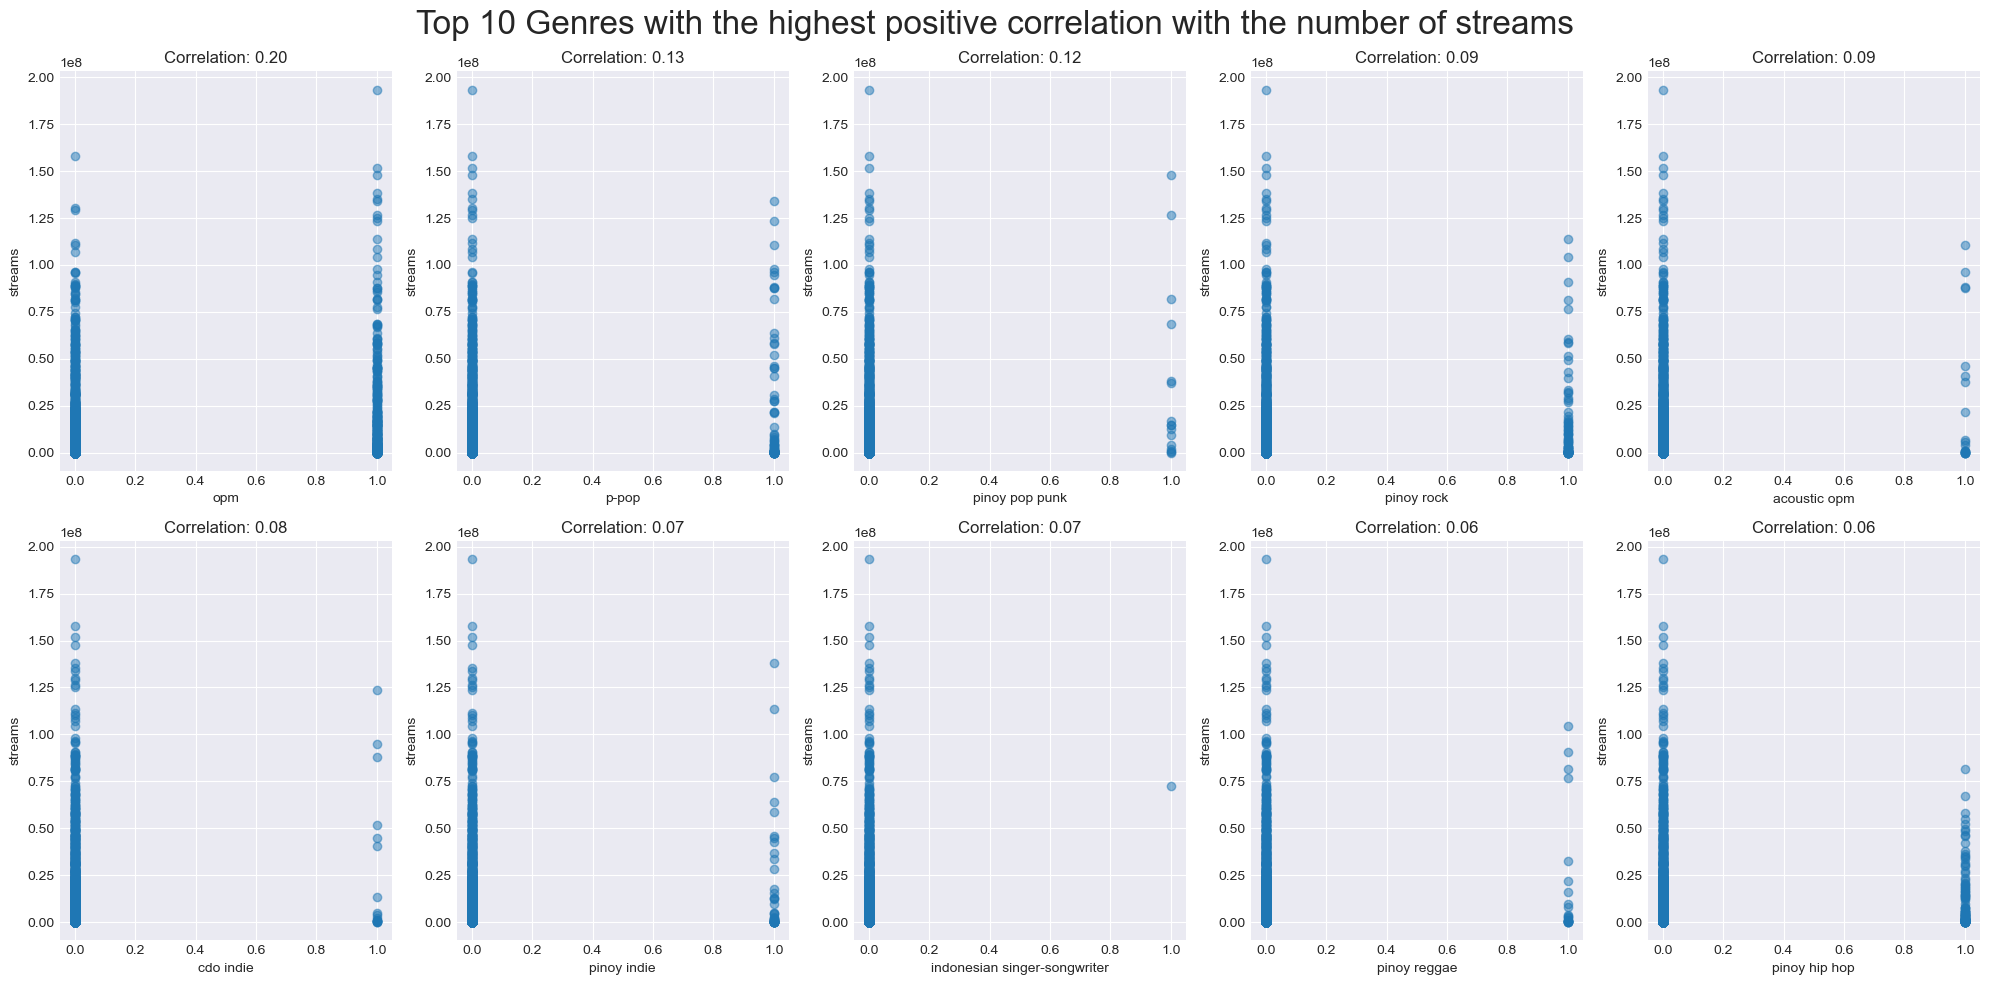

In [70]:
top_10_genres = ['opm','p-pop','pinoy pop punk','pinoy rock','acoustic opm','cdo indie','pinoy indie','indonesian singer-songwriter','pinoy reggae','pinoy hip hop']
y_col = 'streams'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle("Top 10 Genres with the highest positive correlation with the number of streams", fontsize="24")

for i, var in enumerate(top_10_genres):
    corr = np.corrcoef(genres_total_streams_df[var], genres_total_streams_df[y_col])[0][1]
    axes[i//5, i%5].scatter(genres_total_streams_df[var], genres_total_streams_df[y_col], alpha=0.5)
    axes[i//5, i%5].set_xlabel(var)
    axes[i//5, i%5].set_ylabel(y_col)
    axes[i//5, i%5].set_title('Correlation: %.2f'%corr)
plt.tight_layout()
plt.show()

## Results:

In the visualization above, scatter plots between the genre and the number of streams were created for the 10 genres that had the highest positive correlation coefficients. Points that have a value of 0.0 on the x-axis, or the genre of the track means that the track is not in the genre, while points with an x-value of 1.0 is categorized under the genre. The y-axis represents the number of streams a track has.

From the scatter plots presented above, it can be observed that `opm` has the highest correlation coefficient of 0.20, as the genre contains many tracks that had attributed a high stream count. Comparing `opm` with the other genres, it is shown that tracks under these genres generally had a lower frequency of tracks and number of streams.

Given the results from EDA Questions 3 and 4, the observations gained from these analyses can contribute to the scope of the combinations that can be created in the data mining process. Introducing seasonal genre trends as a factor can contribute to the creation of rules, as this factor can be considered in the algorithm, allowing the creation of association rules that consider seasonal genre trends and its association to a high number of streams.

## Question 5:
### With the features stated in EDA Question 2, which features are the most trending throughout the months among the top 200 daily spotify songs?

To answer this question, we will be borrowing the same line of code from Question #2 that sets up the list of tracks and the data regarding its features and store it in a variable we will call `monthly_200_df`.

In [71]:
monthly_200_df = charts_tracks_df[['track_id', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
monthly_200_df

,track_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,0.578,0.574,-6.209,0.0454,0.1960,0.000000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,0.358,0.557,-7.398,0.0590,0.6950,0.000000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,0.662,0.586,-8.821,0.0307,0.0970,0.002720,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,0.783,0.623,-6.126,0.0800,0.3380,0.000000,0.0975,0.447,100.048
...,...,...,...,...,...,...,...,...,...,...
4762,0zWuvPDqBa0WM9Ffwl0rgb,0.799,0.793,-4.938,0.0519,0.0108,0.000001,0.0496,0.467,102.006
4764,6TKDFOO6Rv6VuB9PxcXQO3,0.744,0.572,-9.542,0.2680,0.1520,0.000000,0.0949,0.535,156.071
4765,69CrOS7vEHIrhC2ILyEi0s,0.841,0.384,-7.684,0.0351,0.0236,0.000002,0.0735,0.597,123.961
4766,2YXswOX5aKv6OHRKUcAMLQ,0.779,0.646,-5.884,0.0388,0.0260,0.000027,0.0943,0.628,110.048


In [72]:
monthly_200_df_agg = charts_df[['track_id', 'position','day', 'month', 'year']]
monthly_200_df_agg.tail(5)

,track_id,position,day,month,year
456056,4VXIryQMWpIdGgYR4TrjT1,195,31,3,2023
456057,1Ry0l6trESL8T4ddsRaYLE,196,31,3,2023
456058,5qmXgeIDa1lXB07pgAVlNM,197,31,3,2023
456059,1xK59OXxi2TAAAbmZK0kBL,198,31,3,2023
456060,7bJwvubZZaoGE1AGEfu8Fi,199,31,3,2023


Now we take the variable that contains the positions and dates (`monthly_200_df_agg`) and the variable that contains the track features we have selected (`monthly_200_df`) and combine them, creating the `combine_200_df` variable.

We will be using the `monthly_200_df_agg` as the main keys as we are looking for the trending features of each month so duplicates within the Daily Top 200 should remain duplicated.

In [73]:
combine_200_df = pd.merge(monthly_200_df_agg, monthly_200_df, how='left', on='track_id')
combine_200_df.tail(6)

,track_id,position,day,month,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
456055,1wjzFQodRWrPcQ0AnYnvQ9,194,31,3,2023,0.752,0.505,-7.621,0.2530,0.5350,0.000003,0.1040,0.419,91.970
456056,4VXIryQMWpIdGgYR4TrjT1,195,31,3,2023,0.671,0.529,-7.226,0.3070,0.0769,0.000335,0.0856,0.203,161.989
456057,1Ry0l6trESL8T4ddsRaYLE,196,31,3,2023,0.480,0.299,-12.077,0.0525,0.8380,0.000000,0.1330,0.196,121.750
456058,5qmXgeIDa1lXB07pgAVlNM,197,31,3,2023,0.548,0.554,-6.408,0.0587,0.2830,0.000000,0.0708,0.382,79.918
456059,1xK59OXxi2TAAAbmZK0kBL,198,31,3,2023,0.571,0.544,-10.613,0.0299,0.4530,0.008050,0.3220,0.216,132.052
456060,7bJwvubZZaoGE1AGEfu8Fi,199,31,3,2023,0.624,0.618,-4.868,0.0322,0.1150,0.000003,0.1040,0.122,125.036


After that, we are going to group the table by the month column we have created and assign it to the variable `combine_200_gb`.

To check if it was a success, we will now access the 6th group, which is the month of June.

In [74]:
combine_200_gb = combine_200_df.groupby(by='month')
combine_200_gb.get_group(6)

,track_id,position,day,month,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
30200,72Q0FQQo32KJloivv5xge2,1,1,6,2017,0.599,0.667,-4.267,0.0367,0.0533,0.000000,0.1340,0.817,80.984
30201,5CtI0qwDJkDQGwXD1H1cLb,2,1,6,2017,0.694,0.815,-4.328,0.1200,0.2290,0.000000,0.0924,0.813,88.931
30202,7qiZfU4dY1lWllzX7mPBI3,3,1,6,2017,0.825,0.652,-3.183,0.0802,0.5810,0.000000,0.0931,0.931,95.977
30203,6RUKPb4LETWmmr3iAEQktW,4,1,6,2017,0.617,0.635,-6.769,0.0317,0.0498,0.000014,0.1640,0.446,103.019
30204,0KKkJNfGyhkQ5aFogxQAPU,5,1,6,2017,0.853,0.560,-4.961,0.0406,0.0130,0.000000,0.0944,0.860,134.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401385,3aYCsSuW6ZgIESGteMF586,196,30,6,2022,0.517,0.544,-5.633,0.0258,0.0562,0.000000,0.1200,0.396,80.072
401386,1e9oZCCiX42nJl0AcqriVo,197,30,6,2022,0.548,0.816,-4.209,0.0465,0.1220,0.000000,0.3350,0.557,95.390
401387,1NopgVCMVhCKIm64tF7auX,198,30,6,2022,0.328,0.465,-9.810,0.0328,0.7200,0.000002,0.1750,0.344,148.912
401388,0Yde1VrWbGF2Tus2AQhMuT,199,30,6,2022,0.703,0.756,-3.407,0.0376,0.2220,0.002810,0.0829,0.536,119.999


Lastly, we can get the mean of each feature per month and place them on a line graph where the `X-Value` corresponds to the `month` and the `Y-Value` corresponds to the mean of the specified feature.

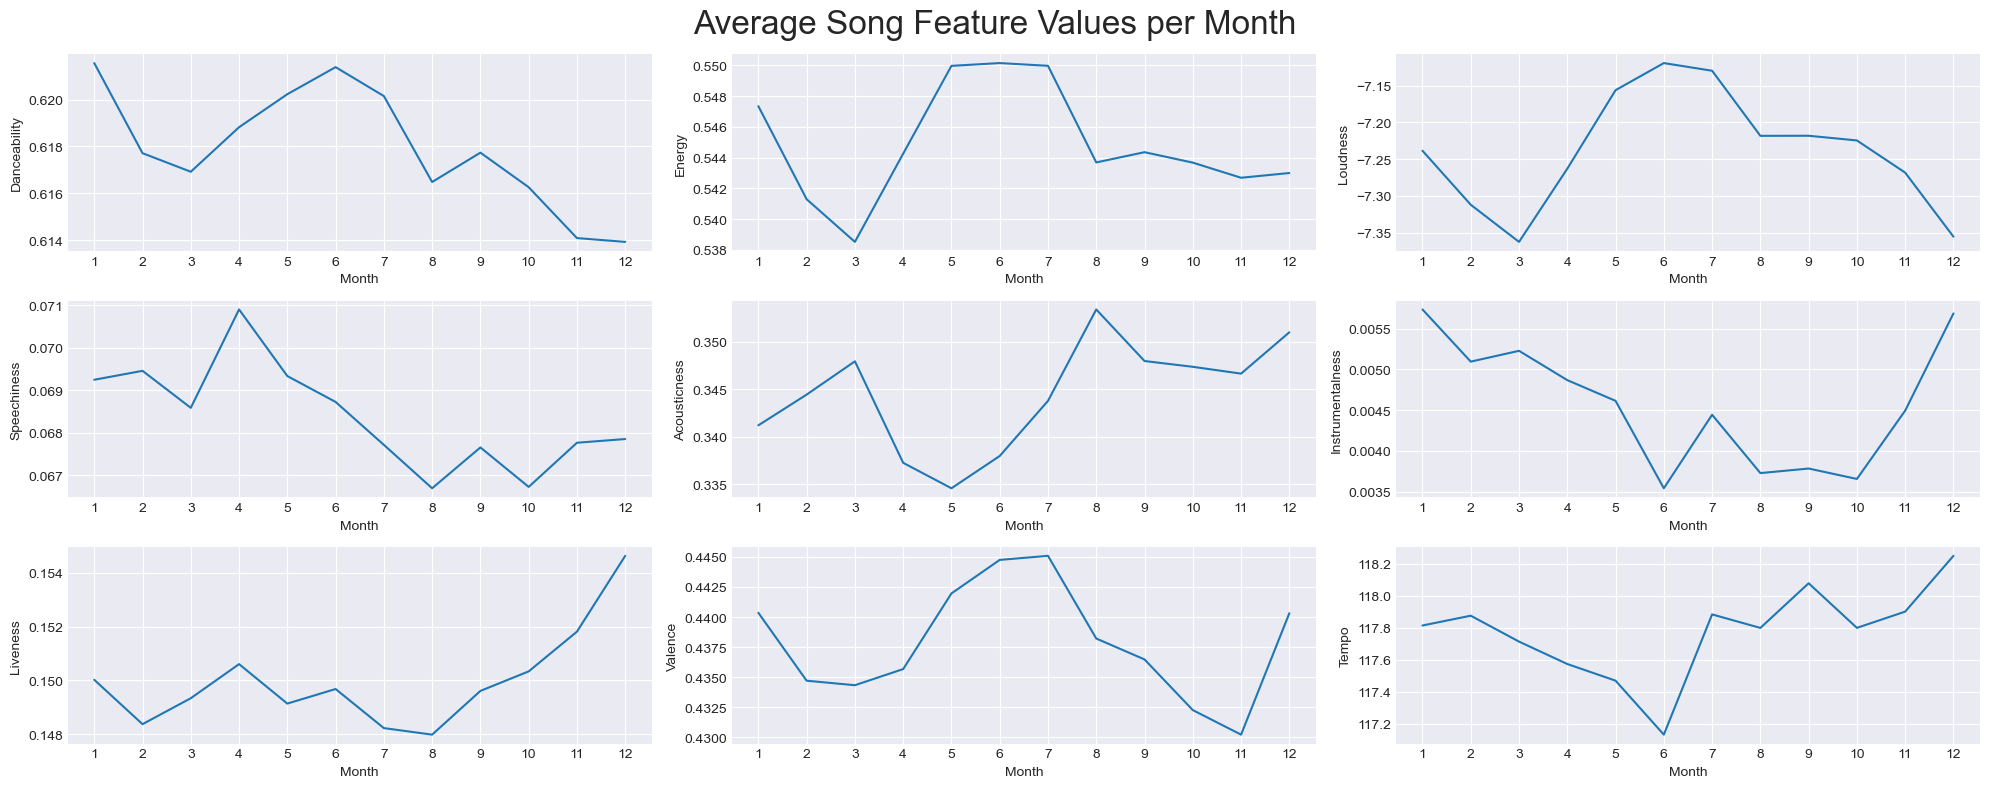

In [75]:
song_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
months = ['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

m_dict = dict()
m_arr = list()

fig, bars = plt.subplots(nrows=3, ncols=3, figsize=(20, 8))
fig.suptitle("Average Song Feature Values per Month", fontsize="24")

for i, var in enumerate(song_features):    
    for j in range(12):
        key = combine_200_gb.get_group(j+1)[var].mean()
        m_dict[j+1] = key
    bars[i//3, i%3].plot(m_dict.keys(), m_dict.values())
    bars[i//3, i%3].set_xlabel('Month')
    bars[i//3, i%3].set_ylabel(var.capitalize())
    bars[i//3, i%3].set_xticks(np.arange(1, 13, 1.0))
    m_arr.append(dict(m_dict))
    # plt.plot(m_dict.values())
    # plt.ylabel(var)
    # plt.xlabel(months[i])
plt.tight_layout()
plt.show()

## Results:
The analysis of the monthly means for the daily charts reveals distinct patterns throughout the different months. For example, during December, there is an increase in the mean instrumentalness and liveness, while there is a decrease in danceability. These observations suggest the precense of seasonal influences that impact the song features throughout a year.

These seasonal trends can offer insights into the nature of musical preferences, aiding the association rule mining process towards a better understanding of the interactions between song features and time. With the incorporation of these trends into the data analysis, the association rule mining algorithm might be able to generate rules that account the seasonal trends present in a month.

Understanding the sesasonal shifts in song features will also aid in the development of promotional strategies that align with the seasonal trends that occur in the Philippines, creating more engaging and tailored campaigns which could possibly result in higher numbers of streams.

# Research Question

Given the observations that arose from the exploratory data analysis, the group would like to further explore the relationships between different combinations of the many song features that tend to associate with a higher count of `streams`. 


### *Which specific combinations of song features, artist popularity, frequency of appearances in the Philippines daily charts, song genres, and particular months are strongly associated with a significant increase in the number of streams on Spotify?*

## Data Mining Technique

This research question focuses on finding the right combinations of the different data found in the dataset, in order to come up with statistical observations that lead to a higher number of `streams`. To answer this question, a methodology of performing **Association Rule Mining** can be performed with numerical data being preprocessed into categorical data through the use of techniques such as binning.

**Example:**

To create a rule based on song features, these can be binned like this:

| Energy | Range |
|-------------|----------|
| High Energy | 0.7 - 1.0|
| Medium Energy | 0.4 - 0.6 |
| Low Energy | 0.0 - 0.3 |

therefore, rules such as:

> {Low Energy, High Acousticness, Ben&Ben, Febuary, OPM} => {High Streams}

can be created, and be tested for usefulness.
    

All numerical data that represents a range of values can be binned into categories that will be used for Association Rule Mining since this data mining technique focuses on identifying significant associations and patterns within categorical data. Through the categorization of these numerical data into specific bins, the algorithm would be able to effectively capture the relationships between different groups to create insights simple data analyses such as linear correlation wouldn't be able to produce. This enables a more complex analysis of the Spotify daily charts dataset, allowing the discovery of valuable associations that answer the research question.

## Importance and Relevance

Discovering and understanding different combinations aimed at achieving popularity can be used for artists and music labels to curate effective promotion strategies, songs, or albums that target the combinations derived from the data mining technique performed. This, in turn could potentially increase the probability of a successful release and obtain an increased number of streams. The insights gained from this study can also be used as basis for music labels and groups, film production companies, and other projects that require music production, to make informed decisions on release timing, artist hiring, and content based on the discovered combinations, leading to more effective and secure investments, as well as better tailored marketing campaigns.

# Phase 2



## Data Modelling

The numerical values of the song features in the **charts_tracks_df** must first be binned into their respective categories in order to preprocess the quantitative nature of these features into qualitative which could then be used for **Association Rule Mining**

In [76]:
charts_tracks_df

#Just a temp copy, mainly for testing, can be removed later 
charts_tracks_df_copy = charts_tracks_df.copy(deep=True)

First, we must define a function called **split_into_parts** which would essentially divide a number into `n` equal parts. It takes three parameters:

- `start` => the starting value where the number will be divided
- `end` => the ending value or the maximum value
- `n_parts` => the number of the parts the _start_ and _end_ values will be divided by.

The function would return an array, as seen in the example below, where each value will be used as the start and end point for a category.

The example below shows the value `1.0` being divided into `3` equal parts. The function returns an array of [0.0, 0.33, 0.67, 1.0]. This array would then be used during the binning of the feature as:

- [0, 0.33] => Low `feature`,
- (0.33, 0.67] => Medium `feature`, and lastly
- (0.67, 1.0] => High `feature`

In [77]:
def split_into_parts(start, end, n_parts):
    return np.linspace(start, end, n_parts+1)

# Example usage:
number = 1.0
parts = 3
result = split_into_parts(0, number, parts)
result

array([0.        , 0.33333333, 0.66666667, 1.        ])

Now, the values of each song feature is then binned with their respective categories where the minimum value of the song feature is used as the start value and the maximum value is used as the end value for the **split_into_parts** function. By default, each feature will be divided into three parts: Low, Medium, and High except for some features that will be shown later.

In [78]:
#If you want to check the range, remove the labels in the function
danceability = pd.cut(charts_tracks_df["danceability"], split_into_parts(0, 1, 3), include_lowest=True, labels=["Low Danceability", "Medium Danceability", "High Danceability"])
danceability.value_counts().sort_index()

Low Danceability        120
Medium Danceability    2115
High Danceability      1785
Name: danceability, dtype: int64

In [79]:
#Trial Binning
energy = pd.cut(charts_tracks_df["energy"], split_into_parts(0, 1, 3), include_lowest=True, labels=["Low Energy", "Medium Energy", "High Energy"])
energy.value_counts().sort_index()

Low Energy        383
Medium Energy    1944
High Energy      1693
Name: energy, dtype: int64

In [80]:
key = pd.cut(charts_tracks_df["key"], split_into_parts(0, 11, 3), include_lowest=True, labels=["Low Key", "Medium Key", "High Key"])
key.value_counts().sort_index()

Low Key       1436
Medium Key    1357
High Key      1227
Name: key, dtype: int64

In [81]:
temp_range = split_into_parts(-60, 0, 3)
temp_range[-1] = float('inf') #Sets float inf as the upper bound (to take care of that one song with a loudness of above 0, also because anything above 0 would still be considered high loudness)
loudness = pd.cut(charts_tracks_df["loudness"], temp_range, include_lowest=True, labels=["Low Loudness", "Medium Loudness", "High Loudness"])
loudness.value_counts().sort_index()

Low Loudness          0
Medium Loudness       5
High Loudness      4015
Name: loudness, dtype: int64

Special case: According to the **Dataset Description**, there are only two modes: `Major` and `Minor` to represent the modality of the track. This is accounted for in binning the **mode** of each song feature

In [82]:
#I dont like this cus range is 0 - 0.5 and 0.5 - 1 but eh it works
mode = pd.cut(charts_tracks_df["mode"], 2, include_lowest=True, labels = ["Minor", "Major"])
mode.value_counts().sort_index()

Minor    1279
Major    2741
Name: mode, dtype: int64

In [83]:
speechiness = pd.cut(charts_tracks_df["speechiness"], split_into_parts(0, 1, 3), include_lowest=True, labels=["Low Speechiness", "Medium Speechiness", "High Speechiness"])
speechiness.value_counts().sort_index()

Low Speechiness       3919
Medium Speechiness      96
High Speechiness         5
Name: speechiness, dtype: int64

In [84]:
acousticness = pd.cut(charts_tracks_df["acousticness"], split_into_parts(0, 1, 3), include_lowest=True, labels=["Low Acousticness", "Medium Acousticness", "High Acousticness"])
acousticness.value_counts().sort_index()

Low Acousticness       2657
Medium Acousticness     793
High Acousticness       570
Name: acousticness, dtype: int64

In [85]:
instrumentalness = pd.cut(charts_tracks_df["instrumentalness"], split_into_parts(0, 1, 3), include_lowest=True, labels=["Low Instrumentalness", "Medium Instrumentalness", "High Instrumentalness"])
instrumentalness.value_counts().sort_index()

Low Instrumentalness       3971
Medium Instrumentalness      21
High Instrumentalness        28
Name: instrumentalness, dtype: int64

Special Case: **Dataset Description** states that 0.8 is a high likelihood that the song is performed live. To account to this, the range is only divided into two with _0.8_ as its maximum value and _1.0_ is appended into the array indicating that the range (0.8, 1.0] is considered as `High Liveness`

In [86]:
#Referring to description, 0.8 is high likelihood that it is performed live
liveness = pd.cut(charts_tracks_df["liveness"], np.append(split_into_parts(0, 0.8, 2), [1.0]), include_lowest=True, labels=["Low Liveness", "Medium Liveness", "High Liveness"])
liveness.value_counts().sort_index()

Low Liveness       3821
Medium Liveness     183
High Liveness        16
Name: liveness, dtype: int64

In [87]:
valence = pd.cut(charts_tracks_df["valence"], split_into_parts(0, 1, 3), include_lowest=True, labels=["Low Valence", "Medium Valence", "High Valence"])
valence.value_counts().sort_index()

Low Valence       1222
Medium Valence    1942
High Valence       856
Name: valence, dtype: int64

In [88]:
tempo = pd.cut(charts_tracks_df["tempo"], np.append(split_into_parts(0, 133.33, 2), np.inf), include_lowest=True, labels=["Low Tempo", "Medium Tempo", "High Tempo"])
tempo.value_counts().sort_index()

Low Tempo         25
Medium Tempo    2816
High Tempo      1179
Name: tempo, dtype: int64

In order to determine `High Streams` and `Low Streams`, we first need to add the total number of streams a song has accumulated overall in **charts_df** and insert it as a new column into **charts_tracks_df**. After that, we can see the top 10 songs that has the most overall streams for the dataset. The category of `Medium Streams` was excluded in this case as it is not needed when trying to find song features specifically for `High Streams` so it was basically divided into `High Streams` or `Not High Streams` for simplicity.

In [89]:
#Merge charts_tracks_df with charts_df_agg which contains the total streams per track
charts_tracks_df_copy = pd.merge(charts_tracks_df_copy, charts_df_agg, on='track_id')

In [90]:
charts_tracks_df_copy.sort_values(by=['streams'], ascending=False, inplace=True)
charts_tracks_df_copy.tail(10)

,release_year,release_month,release_day,track_id,track_name,artist_id,artist_name,album_id,duration,popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration,streams
231,2016,12,10,0ecAxY4uqROZWKSUaRVCK7,"Hey Crush - From ""Vince & Kath & James""",4KOFxteqSAveWCElBVijTy,Joshua Garcia,3zrmszGcMfAndeIQrW7nY3,137090,38,...,1.0,0.0300,0.53400,0.000000,0.2280,0.730,109.054,False,False,15312
267,2017,03,17,54LGxQGf5LPXNGjtzDZ5IE,So Good (feat. Ty Dolla $ign),1Xylc3o4UrD53lo9CvFvVg,Zara Larsson,5YLRVHDVRw3QqWbeTGpC5B,166706,51,...,1.0,0.1460,0.08500,0.000000,0.0458,0.783,82.055,False,False,14969
262,2016,05,13,12mGwph2YzDIlChtq3EdXP,Alone,64KEffDW9EtZ1y2vBYgq8T,Marshmello,2v4Crisjd4sT782Jvn7ISC,273802,16,...,1.0,0.0353,0.02440,0.016400,0.1080,0.397,142.011,True,False,14736
243,2014,12,15,13HVjjWUZFaWilh2QUJKsP,Let It Go,4EzkuveR9pLvDVFNx6foYD,James Bay,5BxvswQSGWrBbVCdx6mFGO,260533,70,...,1.0,0.0288,0.81800,0.000017,0.1070,0.246,147.464,False,False,14659
241,2013,-1,-1,6gTJaPuj8DT8RjuDJyBgzP,Don't,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,6NoBzYmh5gUusGPCfg0pct,219840,55,...,1.0,0.0659,0.01130,0.000000,0.6350,0.849,95.049,True,False,13219
161,2017,03,17,6hmhG1b4LEyNuashVvuIAo,Never Forget You,1Xylc3o4UrD53lo9CvFvVg,Zara Larsson,5YLRVHDVRw3QqWbeTGpC5B,213427,73,...,0.0,0.0457,0.00312,0.000010,0.2690,0.276,145.992,False,False,12343
190,2016,05,27,7nD9nN3jord9wWcfW3Gkcm,All In My Head (Flex) (feat. Fetty Wap),1l8Fu6IkuTP0U5QetQJ5Xt,Fifth Harmony,0pF0oyuPNdOObniB1Ng0kW,210573,61,...,0.0,0.0530,0.02300,0.000000,0.0526,0.755,95.040,False,False,11300
193,2015,10,09,7x5xYW5W42OGPAdHUyyguy,Locked Away (feat. Adam Levine),4TH4BHy0LdBi3dpBW4P2UX,R. City,4AUTMNSP56xicSznzKgzjB,227480,79,...,1.0,0.0678,0.30400,0.000000,0.0452,0.550,118.413,False,False,11209
196,2016,10,21,6bLopGnirdrilrpdVB6Um1,The Greatest,5WUlDfRSoLAfcVSX1WnrxN,Sia,2eV6DIPDnGl1idcjww6xyX,210920,74,...,0.0,0.1740,0.01740,0.001070,0.0512,0.686,191.950,False,False,11097
199,2015,12,04,40YcuQysJ0KlGQTeGUosTC,"Me, Myself & I",02kJSzxNuaWGqwubyUba0Z,G-Eazy,09Q3WwGYsQe5ognkvVkmCu,251466,78,...,0.0,0.0959,0.01840,0.000000,0.1580,0.389,111.995,False,False,11004


In [91]:
streams = charts_tracks_df_copy['streams'] 

In [92]:
streams.describe()

count    4.020000e+03
mean     6.773258e+06
std      1.585995e+07
min      1.100400e+04
25%      1.138325e+05
50%      7.789280e+05
75%      5.001815e+06
max      1.934032e+08
Name: streams, dtype: float64

Due to the large range of the number of streams, to accomodate the outliers caused by a few songs in the dataset haivng very high number of streams reaching billions, the use of percentiles to define the bins would be the best approach as it is less susceptible to extreme values, compared to using the mean, median, or specific fixed thresholds. With this in mind, the data is separated using the 25th percentile, where all data points below the 25% percentile would be binned into `Low Streams`, while the rest would be binned into `High Streams`.

In [93]:
def split_into_quartiles(streams):
    #Array with [min_val, Q1, Q3, max_val]
    min_val = streams.min()
    max_val = streams.max()

    #intervals = [min_val, np.percentile(streams, 25), np.percentile(streams, 75), max_val]
    intervals = [min_val, np.percentile(streams, 25), max_val]
    return intervals
streams_split = pd.cut(streams,split_into_quartiles(streams), include_lowest=True, labels=["Low Streams", "High Streams"])
streams_split.value_counts().sort_index()

Low Streams     1005
High Streams    3015
Name: streams, dtype: int64

Finally, we can replace the numerical columns of the song features including the streams with their binned qualitative counterparts.

In [94]:
pd.set_option('display.max_columns', None)
charts_tracks_df_copy["energy"] = energy
charts_tracks_df_copy["danceability"] = danceability
charts_tracks_df_copy["key"] = key
charts_tracks_df_copy["loudness"] = loudness
charts_tracks_df_copy["mode"] = mode
charts_tracks_df_copy["speechiness"] = speechiness
charts_tracks_df_copy["acousticness"] = acousticness
charts_tracks_df_copy["instrumentalness"] = instrumentalness
charts_tracks_df_copy["liveness"] = liveness
charts_tracks_df_copy["valence"] = valence
charts_tracks_df_copy["tempo"] = tempo
charts_tracks_df_copy['streams'] = streams_split
#charts_tracks_df_copy[charts_tracks_df_copy['streams'] == "High Streams"].head(10)
charts_tracks_df_copy[charts_tracks_df_copy['streams'] == "High Streams"].head(10)

,release_year,release_month,release_day,track_id,track_name,artist_id,artist_name,album_id,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duplicate_by_name,duplicate_by_artistname_duration,streams
856,2017,06,23,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,4nQxblVnnFPehg9ujzdJ8L,318814,72,Medium Danceability,Medium Energy,Low Key,High Loudness,Major,Low Speechiness,Medium Acousticness,Low Instrumentalness,Low Liveness,Low Valence,High Tempo,False,False,High Streams
1,2016,10,28,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,87,Medium Danceability,Medium Energy,High Key,High Loudness,Major,Low Speechiness,High Acousticness,Low Instrumentalness,Low Liveness,Medium Valence,Medium Tempo,False,False,High Streams
978,2017,10,27,1yDiru08Q6omDOGkZMPnei,Maybe The Night,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,6LhZ3QMHGJeTes9cCTxK8e,217197,67,Medium Danceability,High Energy,Low Key,High Loudness,Major,Low Speechiness,Low Acousticness,Low Instrumentalness,Low Liveness,Medium Valence,High Tempo,False,False,High Streams
1323,2018,07,22,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,15ufxdU6r8niuSmA9nu3ly,267759,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,High Streams
1324,2018,04,28,1X4l4i472kW5ofFP8Xo0x0,Sana - Single Version,7tKpXx21KVUOR6vvDs6xtg,I Belong to the Zoo,4njOhY51h2CBqdAX4o41U1,277098,14,High Danceability,Medium Energy,Low Key,High Loudness,Minor,Low Speechiness,Low Acousticness,Low Instrumentalness,Low Liveness,Medium Valence,High Tempo,True,True,High Streams
3029,2020,06,12,16iRlyUMJVPqz62DlomMre,Ikaw Lang,5GVk1KCKa1tdHRev4bMw7V,NOBITA,1nft8RTZE2QYeDPPNEnCBx,263500,76,High Danceability,Medium Energy,High Key,High Loudness,Major,Medium Speechiness,Medium Acousticness,Low Instrumentalness,Low Liveness,Medium Valence,Medium Tempo,True,False,High Streams
1006,2018,02,14,4u8RkgV6P4TLi89SmlUtv8,Mundo,4k9wp4ipHdA1bu1T4x1ZTG,IV Of Spades,2p6QlBCrnKwUFC0wPN1kfV,349713,71,Low Danceability,Low Energy,Medium Key,High Loudness,Minor,Low Speechiness,High Acousticness,Low Instrumentalness,Low Liveness,Low Valence,High Tempo,True,False,High Streams
2980,2021,03,26,5Hm2MJQ4ECvQmH5QWCMQrR,Paraluman,1DlYnIiliftt6R21Y5NOW2,Adie,1WPqdSZcLnQQFhCGK3kJk6,312320,2,Low Danceability,Medium Energy,Low Key,High Loudness,Major,Low Speechiness,Low Acousticness,Low Instrumentalness,Low Liveness,High Valence,High Tempo,True,True,High Streams
502,2017,05,19,1wjzFQodRWrPcQ0AnYnvQ9,I Like Me Better,5JZ7CnR6gTvEMKX4g70Amv,Lauv,7l6fTSFvlumnPFpOSrbnDV,197436,1,Medium Danceability,High Energy,High Key,High Loudness,Major,Low Speechiness,Low Acousticness,Low Instrumentalness,Low Liveness,Medium Valence,High Tempo,True,True,High Streams
1022,2017,04,29,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,4qFxP3qN9GsnZDOkAE6x2m,December Avenue,7xconhHQKj7Be4P2KvUmFz,285138,64,Low Danceability,Low Energy,High Key,High Loudness,Major,Low Speechiness,Medium Acousticness,Low Instrumentalness,Low Liveness,Low Valence,Low Tempo,True,True,High Streams


After binning the `song features`, all the features of each song will be combined into a `basket` representing a set containing each feature of that specific song

In [95]:
#Basket Creation
pd.set_option('display.max_colwidth', None)
charts_tracks_df_copy['feature_basket'] = charts_tracks_df_copy[['energy', 'danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'streams']].values.tolist()
charts_tracks_df_copy['feature_basket']

856         [Medium Energy, Medium Danceability, Low Key, High Loudness, Major, Low Speechiness, Medium Acousticness, Low Instrumentalness, Low Liveness, Low Valence, High Tempo, High Streams]
1       [Medium Energy, Medium Danceability, High Key, High Loudness, Major, Low Speechiness, High Acousticness, Low Instrumentalness, Low Liveness, Medium Valence, Medium Tempo, High Streams]
978           [High Energy, Medium Danceability, Low Key, High Loudness, Major, Low Speechiness, Low Acousticness, Low Instrumentalness, Low Liveness, Medium Valence, High Tempo, High Streams]
1323                                                                                                                       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, High Streams]
1324          [Medium Energy, High Danceability, Low Key, High Loudness, Minor, Low Speechiness, Low Acousticness, Low Instrumentalness, Low Liveness, Medium Valence, High Tempo, High Streams]
                                   

The baskets are then `one-hot encoded` so that it would be useable for obtaining the `frequent itemsets` for `Association Rule Mining`.

In [96]:
feature_basket_df = charts_tracks_df_copy['feature_basket']
feature_basket_df

#Create a new dataframe with feature_bakset_df but one hot encoded
new_feature_basket_df = pd.get_dummies(feature_basket_df.apply(pd.Series).stack()).sum(level=0)



C:\Users\Luis\AppData\Local\Temp\ipykernel_27688\359975965.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  new_feature_basket_df = pd.get_dummies(feature_basket_df.apply(pd.Series).stack()).sum(level=0)


In [97]:
new_feature_basket_df.head(10)

,High Acousticness,High Danceability,High Energy,High Instrumentalness,High Key,High Liveness,High Loudness,High Speechiness,High Streams,High Tempo,High Valence,Low Acousticness,Low Danceability,Low Energy,Low Instrumentalness,Low Key,Low Liveness,Low Speechiness,Low Streams,Low Tempo,Low Valence,Major,Medium Acousticness,Medium Danceability,Medium Energy,Medium Instrumentalness,Medium Key,Medium Liveness,Medium Loudness,Medium Speechiness,Medium Tempo,Medium Valence,Minor
856,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0
978,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1323,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1324,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
3029,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0
1006,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2980,0,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
502,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1022,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0


## Association Rule Mining Algorithm

Once all data has been pre-processed, the basket can now undergo the Association Rule Mining to derive the rules that would answer the research question. First, the file `rule_miner.py` will be used to create a `RuleMiner` instance that contains all the necessary methods to perform this algorithm.

In [98]:
from rule_miner import RuleMiner

In [99]:
#Create a RuleMiner instance with the support and confidence threshold
support_t = 100
confidence_t = 0.65
rule_miner = RuleMiner(support_t = support_t, confidence_t = confidence_t)

# note: not final direction
To determine the best support and confidence thresholds, multiple trials will be performed. The first rule mining attempt would have a $S_\theta$ of 100 and a $C_\theta$ of 0.65. This first attempt will use low values initally to determine if there would be any rules created in relation to a high number of streams.

## Testing `RuleMiner` methods


In [100]:
frequent_itemsets = rule_miner.get_frequent_itemsets(data=new_feature_basket_df.head(400))
frequent_itemsets

[['High Loudness',
  'High Streams',
  'Low Acousticness',
  'Low Instrumentalness',
  'Low Liveness',
  'Low Speechiness',
  'Major',
  'Medium Tempo']]

To determine the confidence of a rule, the method `get_confidence()`

In [101]:
#test confidence of high_acousticness -> high_streams
high_acousticness_confidence = rule_miner.get_confidence(data=new_feature_basket_df,rule=[["High Loudness"], ["High Streams"]])
print(high_acousticness_confidence)

['High Loudness', 'High Streams']
['High Loudness']
Confidence: 0.7485431235431236
0.7485431235431236


In [102]:
#testing support of an item
high_energy_support = rule_miner.get_support(data=new_feature_basket_df, itemset={"High Energy"})
print(high_energy_support)

1413


e:\YEAR 3 TERM 1\CSMODEL\CSMODEL-Project-XX22-G1\rule_miner.py:26: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  support = data[itemset].all(axis=1).sum()


### Rule Miner 1 Params:
$S_\theta$ = 200

$C_\theta$ = 0.75 (75% confidence)

In [103]:
#Get Rules
rules = rule_miner.get_association_rules(data=new_feature_basket_df, filter = "High Streams")


Previous itemset count:  2
New itemset count:  2
['High Danceability', 'High Energy', 'High Loudness', 'High Streams', 'Low Acousticness', 'Low Instrumentalness', 'Low Liveness', 'Low Speechiness', 'Major', 'Medium Tempo', 'Medium Valence']
['High Danceability', 'High Energy', 'High Loudness', 'High Streams', 'Low Acousticness', 'Low Instrumentalness', 'Low Liveness', 'Low Speechiness', 'Major', 'Medium Tempo']
Confidence: 0.517948717948718
['Medium Valence', 'High Danceability', 'High Energy', 'High Loudness', 'High Streams', 'Low Acousticness', 'Low Instrumentalness', 'Low Liveness', 'Low Speechiness', 'Major', 'Medium Tempo']
['Medium Valence']
Confidence: 0.060587882423515295
['High Danceability', 'High Energy', 'High Loudness', 'High Streams', 'Low Acousticness', 'Low Instrumentalness', 'Low Liveness', 'Low Speechiness', 'Major', 'Medium Valence', 'Medium Tempo']
['High Danceability', 'High Energy', 'High Loudness', 'High Streams', 'Low Acousticness', 'Low Instrumentalness', 'Low 

In [106]:
rules

[{'Rule': [[['High Danceability',
     'High Energy',
     'High Loudness',
     'High Streams',
     'Low Acousticness',
     'Low Instrumentalness',
     'Low Liveness',
     'Low Speechiness',
     'Major',
     'Medium Valence'],
    ['Medium Tempo']]],
  'Confidence': [0.8559322033898306]},
 {'Rule': [[['High Danceability',
     'High Energy',
     'High Loudness',
     'High Streams',
     'Low Acousticness',
     'Low Instrumentalness',
     'Low Liveness',
     'Major',
     'Medium Tempo',
     'Medium Valence'],
    ['Low Speechiness']]],
  'Confidence': [1.0]},
 {'Rule': [[['High Danceability',
     'High Energy',
     'High Loudness',
     'High Streams',
     'Low Acousticness',
     'Low Instrumentalness',
     'Low Speechiness',
     'Major',
     'Medium Tempo',
     'Medium Valence'],
    ['Low Liveness']]],
  'Confidence': [0.9099099099099099]},
 {'Rule': [[['High Danceability',
     'High Energy',
     'High Loudness',
     'High Streams',
     'Low Acousticness',
  

In [105]:

for rule in rules:
    #only display the rules that suggest high streams
    if (rule["Rule"][1] == ["High Streams"]):
        print('Rule: ', rule["Rule"][0], " -> ", rule["Rule"][1])
        print('Confidence: ', rule["Confidence"])
        #rule_miner.get_confidence(data=new_feature_basket_df, rule=rule) #computes and prints the confidence of the rule
        print('Support: ', rule_miner.get_support(data=new_feature_basket_df, itemset=rule["Rule"][0]))

Rule:  ['High Danceability', 'High Energy', 'High Loudness', 'Low Acousticness', 'Low Instrumentalness', 'Low Liveness', 'Low Speechiness', 'Major', 'Medium Tempo', 'Medium Valence']  ->  ['High Streams']
Confidence:  0.7266187050359713
Support:  139
Rule:  ['High Energy', 'High Loudness', 'Low Acousticness', 'Low Instrumentalness', 'Low Liveness', 'Low Speechiness', 'Major', 'Medium Danceability', 'Medium Tempo', 'Medium Valence']  ->  ['High Streams']
Confidence:  0.723404255319149
Support:  141


### Discovered rules:
$S_\theta$ = 200

$C_\theta$ = 0.75 (75% confidence)

1. {High Energy, High Loudness, Low Acousticness, Low Instrumentalness, Low Liveness, Low Speechiness, Major Key, Medium Danceability, Medium Tempo} → {High Streams}

<hr>

$S_\theta$ = 100

$C_\theta$ = 0.65 (65% confidence)

1. {High Danceability, High Energy, High Loudness, Low Acousticness, Low Instrumentalness, Low Liveness, Low Speechiness, Major Key, Medium Tempo, Medium Valence} → {High Streams} Confidence = 0.7266187 Support = 139
2. {High Energy, High Loudness, Low Acousticness, Low Instrumentalness, Low Liveness, Low Speechiness, Major Key, Medium Danceability, Medium Tempo, Medium Valence} → {High Streams} Confidence = 0.723404255 Support = 141

## Insights and Conclusions